In [1]:
% matplotlib inline
# % config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
 
#SET UP FIGURE AESTHETICS 
plt.rcParams.update({'axes.labelsize': 20, 'font.size': 20,
                     'legend.fontsize': 18, 'xtick.labelsize': 18,
                     'ytick.labelsize': 18, 'axes.linewidth': 1.5})
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]

#Options
params = {'text.usetex' : True,
          'font.size' : 20,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

import pickle
from scipy.interpolate import interp1d

### used for pooling intensity map
import skimage.measure

from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

import lnn as lnn

### load in models
from models_to_load import *

np.random.seed(1337)

%load_ext autoreload

In [2]:
%autoreload
# %autoreload 0
#%autoreload 2

# Setup Learning Enviornment

In [3]:
import tensorflow as tf
from tensorflow import keras

mapLoc = '../maps2/basic_Li/'
different_mapLoc = '../maps2/random_maps2/'
random_small_Li_mapLoc = '../maps2/random_small_Li/'
catLoc = '../catalogues2/'
modelLoc = '../models2/'
modelLoc2 = '../models3/'
modelLoc4 = '../models4/'
modelLoc5 = '../models5/'
dataLoc = '../data/'
valPredictionLoc = dataLoc + 'predictions/'

### map info
numb_maps = 100
pix_x = 256
pix_y = 256

### output info
lum_func_size = 49
less_lums = 35

# Load the maps

In [4]:
subFields = lnn.loadBaseFNames(mapLoc)
base = [mapLoc + s for s in subFields]
lumLogBinCents = lnn.loadData(base[152] + '_lum.npz')['logBinCent']

subFields = lnn.loadBaseFNames(different_mapLoc)
different_base = [different_mapLoc + s for s in subFields]

# subFields = lnn.loadBaseFNames(random_small_Li_mapLoc)
# random_small_Li_base = [random_small_Li_mapLoc + s for s in subFields]

subFields = lnn.loadBaseFNames(random_small_Li_mapLoc)
np.random.seed(1234)
np.random.shuffle(subFields)
np.random.seed()

### shuffle  test and validation data
random_small_Li_base = [random_small_Li_mapLoc + s for s in subFields]

# Load Models

### Full Models

In [5]:
basic_resnet = get_master_res_next(modelLoc5, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='basic_resnet',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [5]:
noisy_resnet = get_master_res_next(modelLoc5, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='noisy_resnet',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [6]:
noisy_random_resnet = get_master_res_next(modelLoc5, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='noisy_random_resnet',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [7]:
foreground_resnet = get_master_res_next(modelLoc5, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='foreground_resnet',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [8]:
foreground_random_resnet = get_master_res_next(modelLoc5, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='foreground_random_resnet',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [9]:
noisy_foreground_resnet = get_master_res_next(modelLoc5, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='noisy_foreground_resnet',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [92]:
noisy_foreground_random_resnet = get_master_res_next(modelLoc5, 64, 64, 10, lum_func_size,
                extra_file_name='', file_name='noisy_foreground_random_resnet',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

### Less Lum Models

In [11]:
noisy_resnet_less_lums = get_master_res_next(modelLoc5, 64, 64, 10, less_lums,
                extra_file_name='', file_name='noisy_resnet_less_lums',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [12]:
noisy_random_resnet_less_lums = get_master_res_next(modelLoc5, 64, 64, 10, less_lums,
                extra_file_name='', file_name='noisy_random_resnet_less_lums',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [13]:
foreground_resnet_less_lums = get_master_res_next(modelLoc5, 64, 64, 10, less_lums,
                extra_file_name='', file_name='foreground_resnet_less_lums',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [14]:
foreground_random_resnet_less_lums = get_master_res_next(modelLoc5, 64, 64, 10, less_lums,
                extra_file_name='', file_name='foreground_random_resnet_less_lums',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [15]:
noisy_foreground_resnet_less_lums = get_master_res_next(modelLoc5, 64, 64, 10, less_lums,
                extra_file_name='', file_name='noisy_foreground_resnet_less_lums',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

In [10]:
noisy_foreground_random_resnet_less_lums = get_master_res_next(modelLoc5, 64, 64, 10, less_lums,
                extra_file_name='', file_name='noisy_foreground_random_resnet_less_lums',
                dense_layer=1000, base_filters=64, cardinality=1,
                give_weights=True, use_bias=True)

# See how good the models are

## No noise or foregrounds

707 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13667_rotate_0_subfield_28__Li_7.187e-03_1.398e+00_-1.849e+00_3.092e-01_2.972e-01 ----------------------------
Error and MSE for the given base_number:
[0.01258928794413805, 0.025795277208089828]


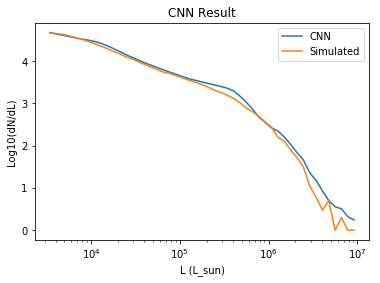

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:197: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


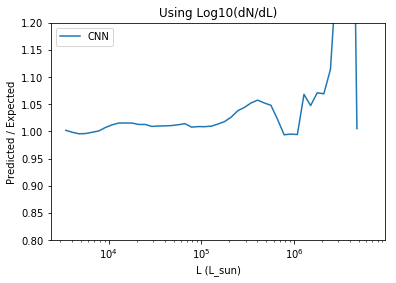

1329 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13831_rotate_0_subfield_24__Li_5.243e-03_1.358e+00_-1.404e+00_2.969e-01_2.995e-01 ----------------------------
Error and MSE for the given base_number:
[0.0099244127050042152, 0.020515857264399529]


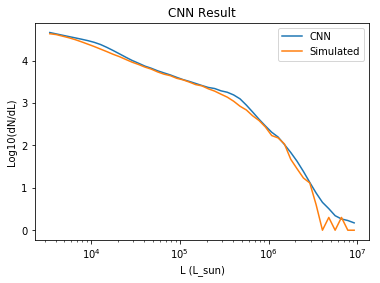

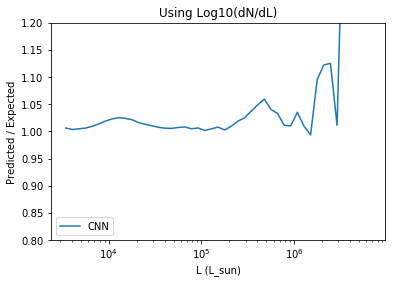

4880 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13831_rotate_0_subfield_17__Li_-1.277e-02_1.331e+00_-2.126e+00_2.866e-01_2.943e-01 ----------------------------
Error and MSE for the given base_number:
[0.0064059263095259666, 0.01289777085185051]


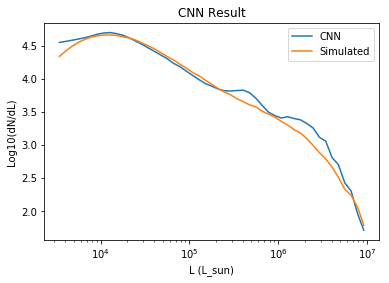

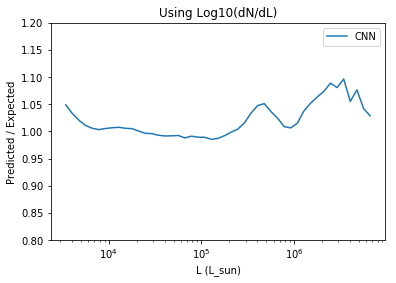

225 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13795_rotate_0_subfield_10__Li_8.846e-03_1.363e+00_-2.323e+00_2.930e-01_2.973e-01 ----------------------------
Error and MSE for the given base_number:
[0.0032379226759076118, 0.0064877537079155445]


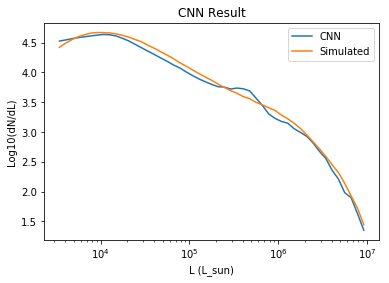

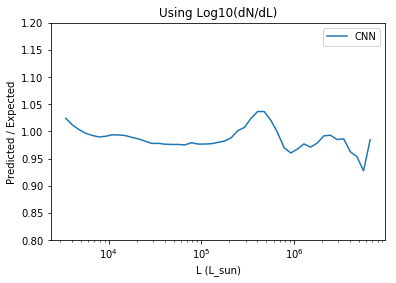

4765 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13665_rotate_0_subfield_20__Li_3.027e-02_1.373e+00_-1.327e+00_2.959e-01_3.097e-01 ----------------------------
Error and MSE for the given base_number:
[0.0057656862773001194, 0.011633254587650299]


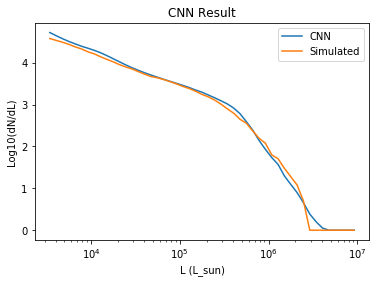

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:197: RuntimeWarning: invalid value encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


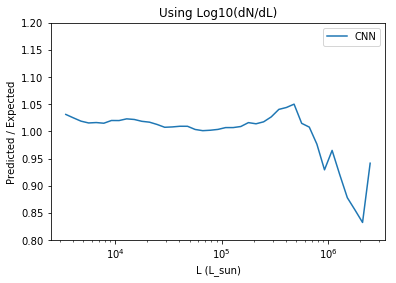

3568 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13795_rotate_0_subfield_7__Li_4.001e-02_1.370e+00_-1.834e+00_3.054e-01_2.972e-01 ----------------------------
Error and MSE for the given base_number:
[0.0070154070854187012, 0.014277080073952675]


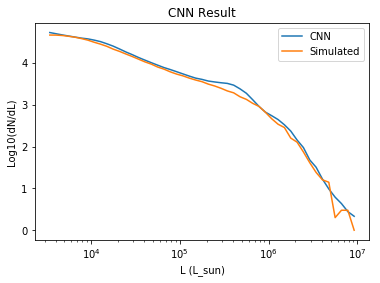

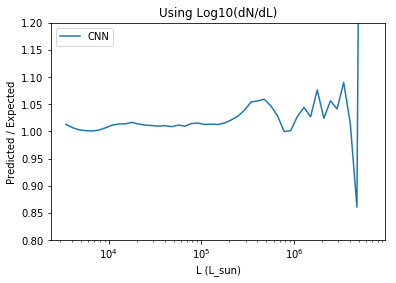

In [6]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(basic_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=0, add_foregrounds=False,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

5663 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13831_rotate_0_subfield_2__Li_1.574e-02_1.352e+00_-1.688e+00_3.017e-01_3.042e-01 ----------------------------
Error and MSE for the given base_number:
[0.045067280530929565, 0.093913935124874115]


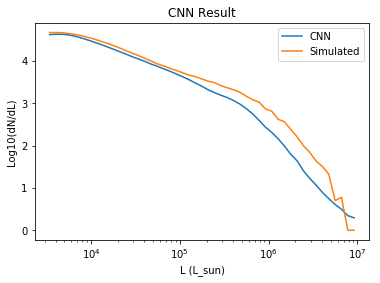

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:197: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


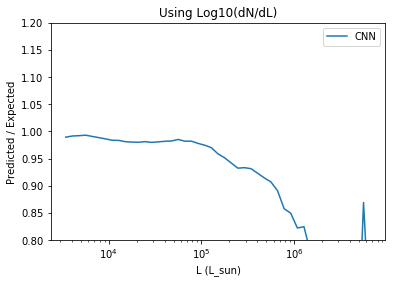

5597 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13799_rotate_0_subfield_31__Li_-1.773e-02_1.352e+00_-1.796e+00_3.039e-01_2.986e-01 ----------------------------
Error and MSE for the given base_number:
[0.11275456845760345, 0.24419534206390381]


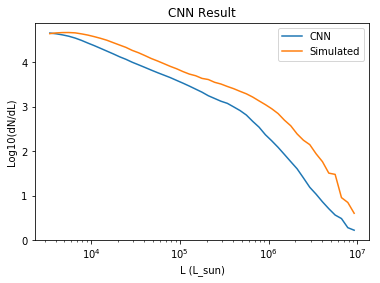

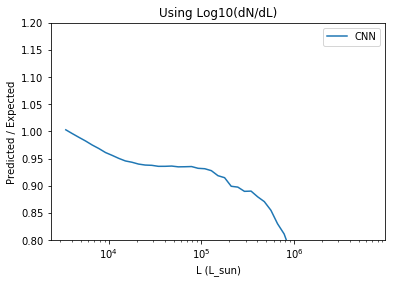

982 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13719_rotate_0_subfield_9__Li_-9.390e-03_1.346e+00_-1.879e+00_3.018e-01_3.176e-01 ----------------------------
Error and MSE for the given base_number:
[0.032284881919622421, 0.066527202725410461]


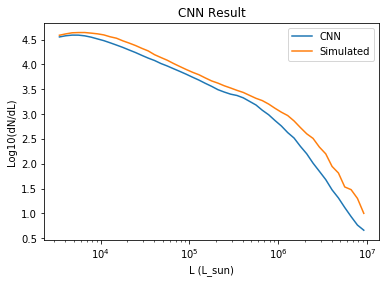

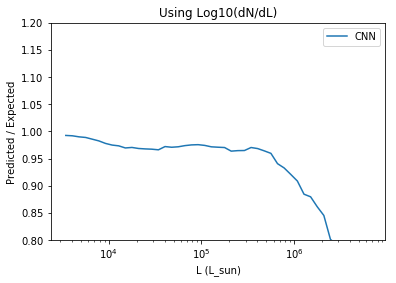

1103 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13619_rotate_0_subfield_9__Li_-1.077e-02_1.293e+00_-1.324e+00_2.963e-01_3.117e-01 ----------------------------
Error and MSE for the given base_number:
[0.017153313383460045, 0.035119306296110153]


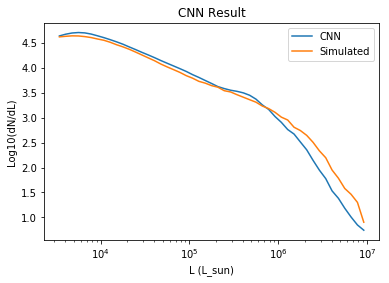

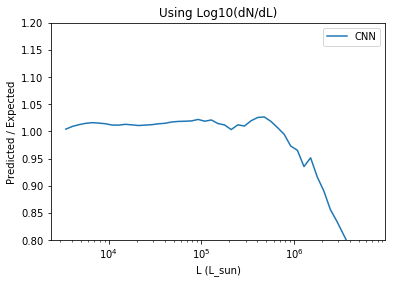

1861 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13807_rotate_0_subfield_29__Li_1.891e-02_1.345e+00_-2.317e+00_3.126e-01_2.916e-01 ----------------------------
Error and MSE for the given base_number:
[0.0026543955318629742, 0.0053240852430462837]


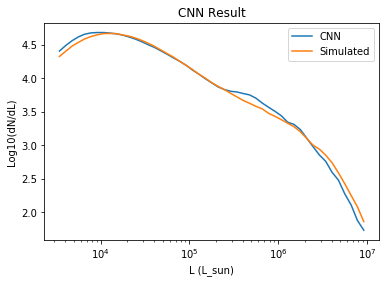

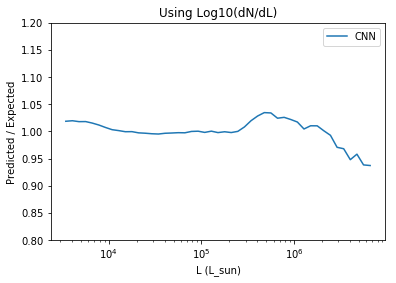

3461 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13793_rotate_0_subfield_26__Li_-4.681e-03_1.318e+00_-1.707e+00_3.012e-01_2.977e-01 ----------------------------
Error and MSE for the given base_number:
[0.069958634674549103, 0.14778707921504974]


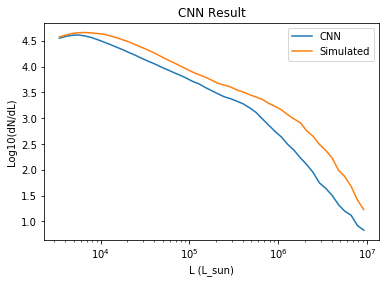

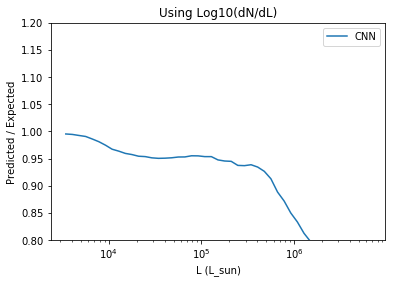

In [9]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=0, add_foregrounds=False,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

5523 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13695_rotate_0_subfield_18__Li_4.809e-02_1.335e+00_-1.851e+00_2.954e-01_2.906e-01 ----------------------------
Error and MSE for the given base_number:
[0.003417004831135273, 0.0068704639561474323]


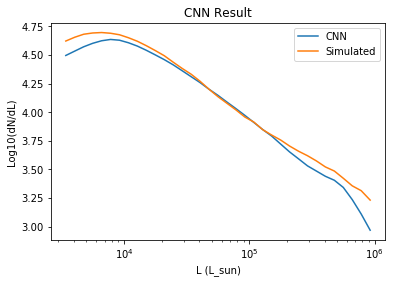

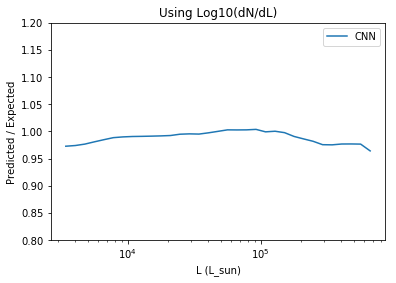

3360 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13745_rotate_0_subfield_16__Li_-2.162e-02_1.393e+00_-2.262e+00_2.909e-01_3.097e-01 ----------------------------
Error and MSE for the given base_number:
[0.0011676379945129156, 0.0023396050091832876]


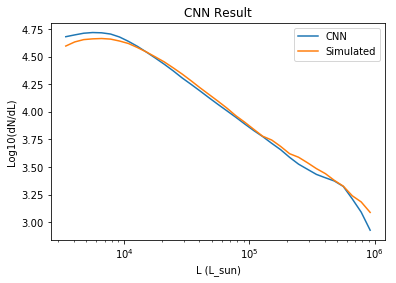

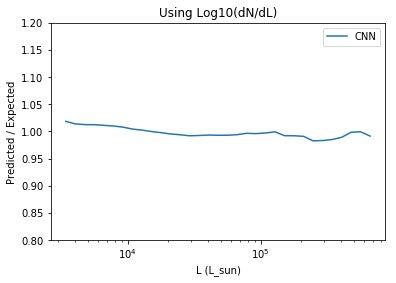

2105 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13669_rotate_0_subfield_22__Li_-2.124e-02_1.362e+00_-1.577e+00_2.912e-01_2.827e-01 ----------------------------
Error and MSE for the given base_number:
[0.030567202717065811, 0.062724672257900238]


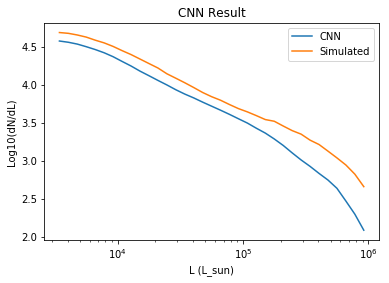

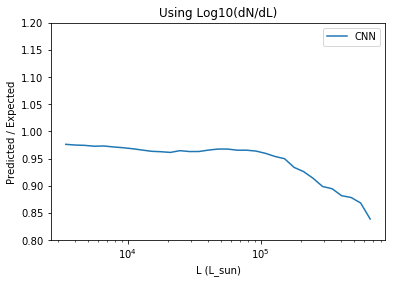

3861 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13855_rotate_0_subfield_1__Li_-1.705e-02_1.351e+00_-1.337e+00_3.130e-01_3.033e-01 ----------------------------
Error and MSE for the given base_number:
[0.0047480310313403606, 0.0095632374286651611]


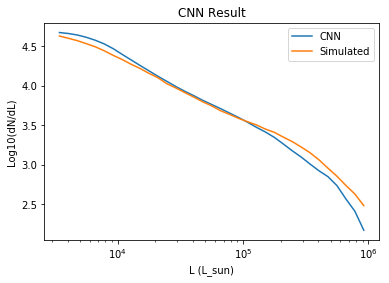

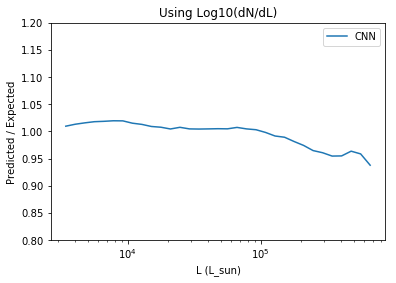

4808 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13861_rotate_0_subfield_35__Li_-1.269e-02_1.394e+00_-1.926e+00_3.001e-01_2.931e-01 ----------------------------
Error and MSE for the given base_number:
[0.0023566298186779022, 0.0047330730594694614]


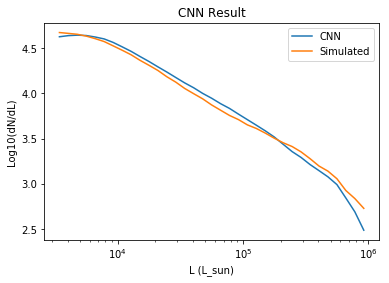

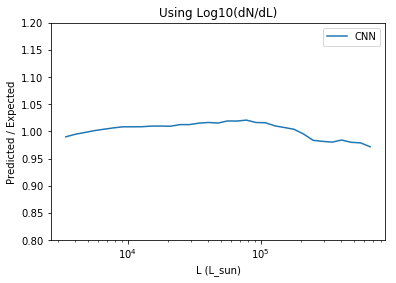

1252 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13691_rotate_0_subfield_31__Li_-4.331e-02_1.310e+00_-1.930e+00_3.046e-01_2.937e-01 ----------------------------
Error and MSE for the given base_number:
[0.016439527273178101, 0.033305834978818893]


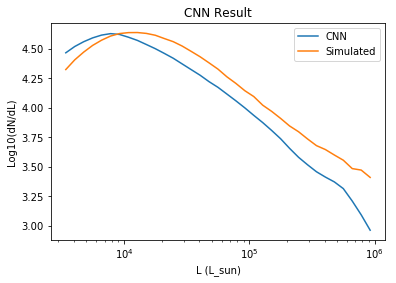

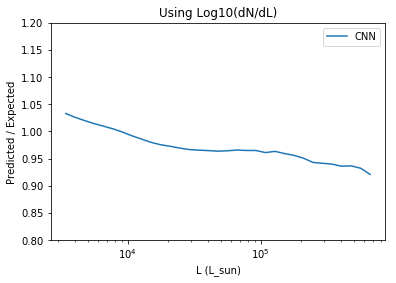

In [11]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet_less_lums, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=less_lums,
                                           make_map_noisy=0, add_foregrounds=False,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=less_lums)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=less_lums)

### Just Noise

3268 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13779_rotate_0_subfield_12__Li_3.735e-02_1.386e+00_-2.410e+00_2.945e-01_3.102e-01 ----------------------------
Error and MSE for the given base_number:
[0.020602032542228699, 0.041553642600774765]


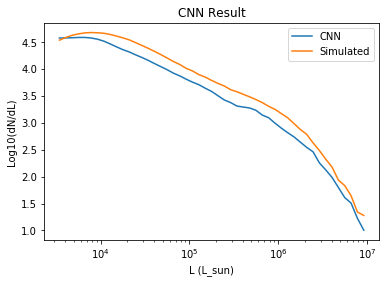

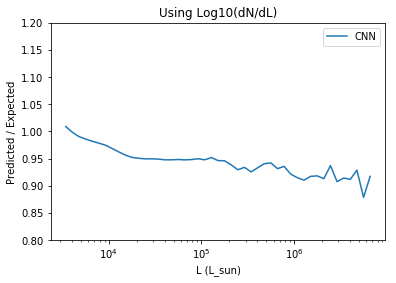

4550 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13695_rotate_0_subfield_31__Li_2.377e-02_1.354e+00_-1.695e+00_3.113e-01_2.991e-01 ----------------------------
Error and MSE for the given base_number:
[0.020888051018118858, 0.043908685445785522]


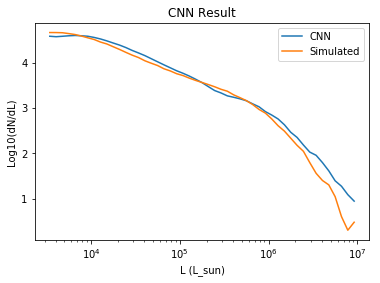

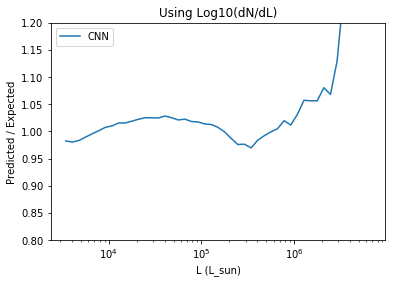

2493 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13723_rotate_0_subfield_32__Li_-3.337e-02_1.304e+00_-1.694e+00_2.968e-01_3.016e-01 ----------------------------
Error and MSE for the given base_number:
[0.0028999629430472851, 0.0058139818720519543]


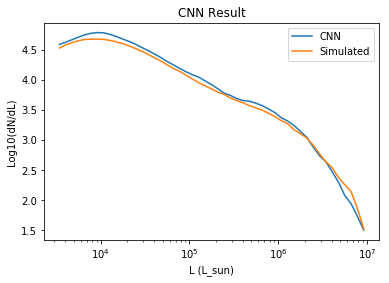

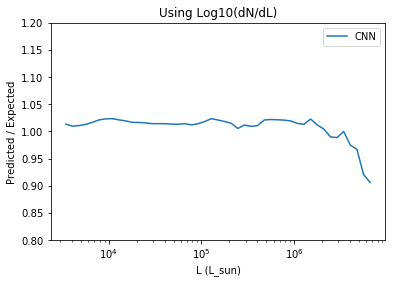

4241 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13589_rotate_0_subfield_3__Li_8.865e-03_1.371e+00_-8.517e-01_2.999e-01_3.028e-01 ----------------------------
Error and MSE for the given base_number:
[0.0541398786008358, 0.11510042101144791]


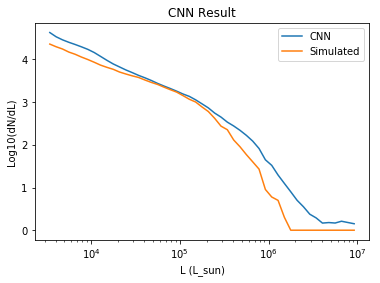

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


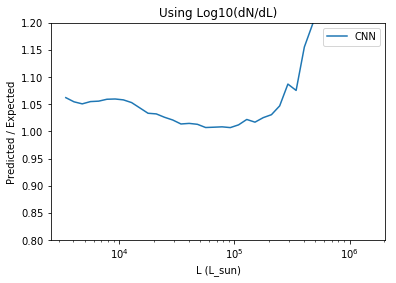

3404 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13623_rotate_0_subfield_14__Li_-1.563e-02_1.431e+00_-2.035e+00_2.855e-01_2.790e-01 ----------------------------
Error and MSE for the given base_number:
[0.11048990488052368, 0.25537312030792236]


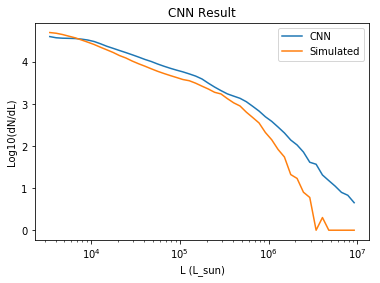

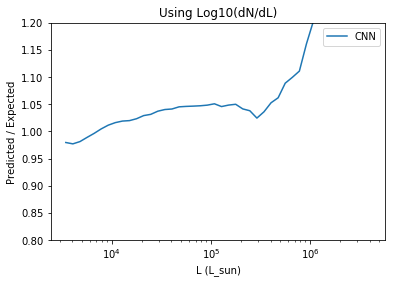

549 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13679_rotate_0_subfield_0__Li_-5.946e-02_1.328e+00_-1.729e+00_3.176e-01_3.185e-01 ----------------------------
Error and MSE for the given base_number:
[0.03240584209561348, 0.067162781953811646]


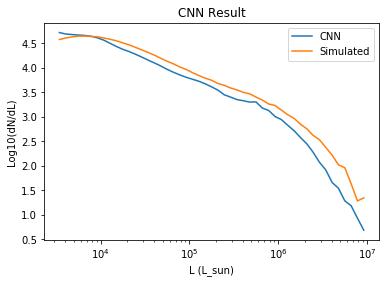

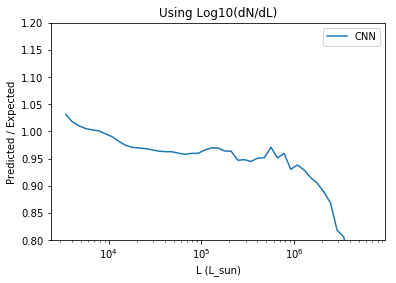

In [7]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=11, add_foregrounds=False,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

5115 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13737_rotate_0_subfield_11__Li_-1.532e-02_1.364e+00_-1.677e+00_2.889e-01_3.061e-01 ----------------------------
Error and MSE for the given base_number:
[0.034610874950885773, 0.075283803045749664]


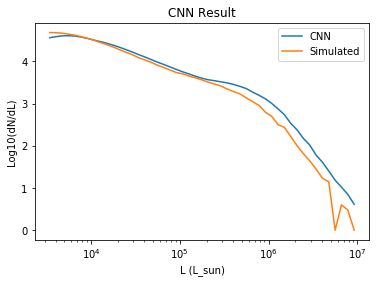

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


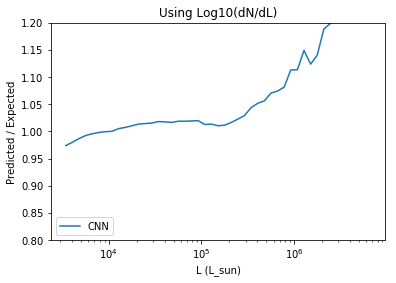

1076 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13619_rotate_0_subfield_6__Li_-4.494e-02_1.372e+00_-2.476e+00_2.914e-01_2.959e-01 ----------------------------
Error and MSE for the given base_number:
[0.038662910461425781, 0.078844599425792694]


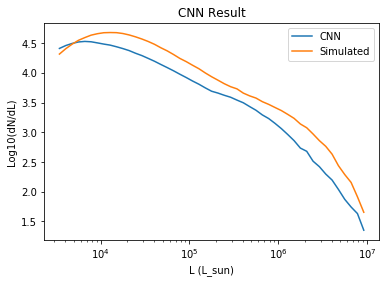

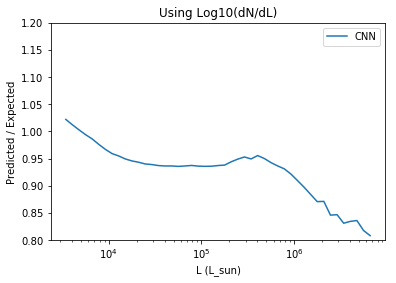

5780 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13713_rotate_0_subfield_19__Li_1.602e-02_1.361e+00_-1.852e+00_2.852e-01_2.999e-01 ----------------------------
Error and MSE for the given base_number:
[0.0060564703308045864, 0.012300590053200722]


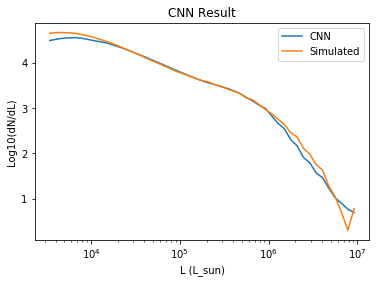

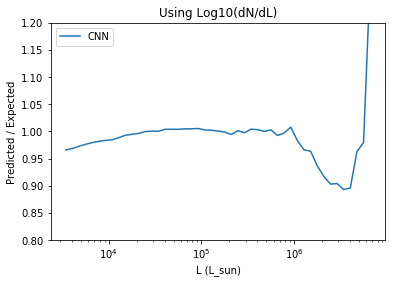

925 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13703_rotate_0_subfield_26__Li_5.515e-02_1.372e+00_-2.001e+00_2.935e-01_2.890e-01 ----------------------------
Error and MSE for the given base_number:
[0.029437936842441559, 0.059913050383329391]


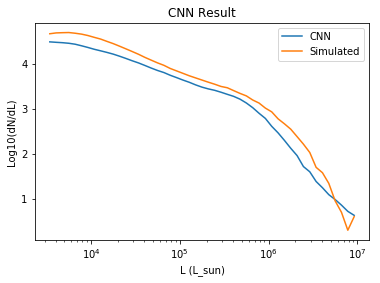

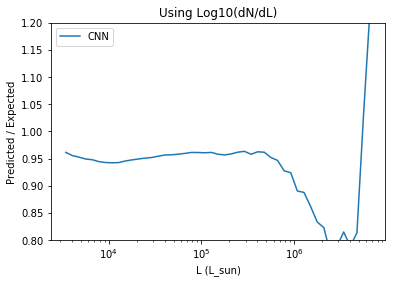

342 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13787_rotate_0_subfield_13__Li_-2.623e-02_1.402e+00_-1.936e+00_3.188e-01_2.918e-01 ----------------------------
Error and MSE for the given base_number:
[0.032256782054901123, 0.065872311592102051]


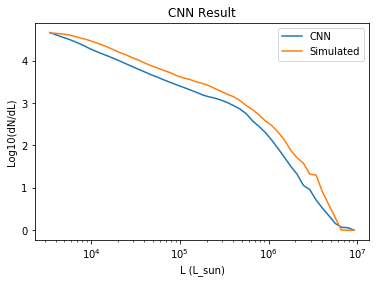

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: invalid value encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


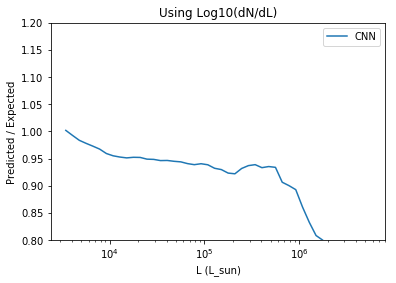

2958 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13665_rotate_0_subfield_9__Li_8.157e-02_1.370e+00_-1.532e+00_3.012e-01_3.011e-01 ----------------------------
Error and MSE for the given base_number:
[0.027126545086503029, 0.05709804967045784]


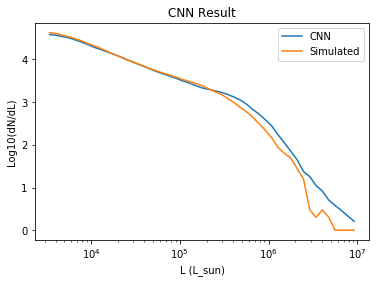

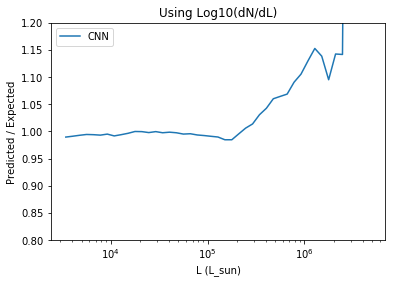

In [14]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=(0, 20), add_foregrounds=False,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

5549 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13863_rotate_0_subfield_6__Li_-6.509e-02_1.372e+00_-1.095e+00_3.113e-01_2.960e-01 ----------------------------
Error and MSE for the given base_number:
[0.0038437724579125643, 0.0077459318563342094]


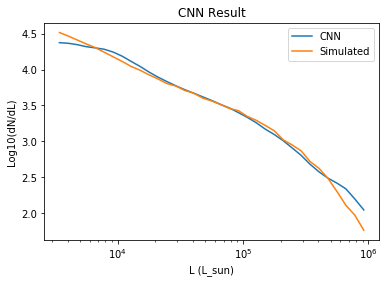

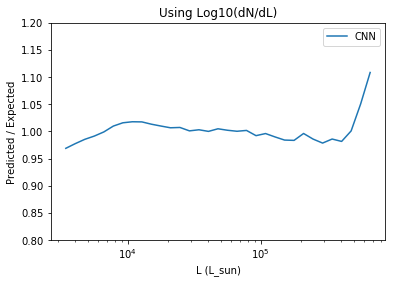

3584 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13731_rotate_0_subfield_34__Li_-1.660e-02_1.336e+00_-1.883e+00_3.033e-01_2.996e-01 ----------------------------
Error and MSE for the given base_number:
[0.0086407847702503204, 0.017516231164336205]


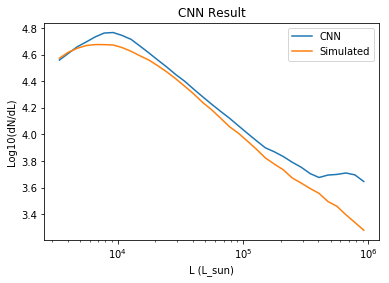

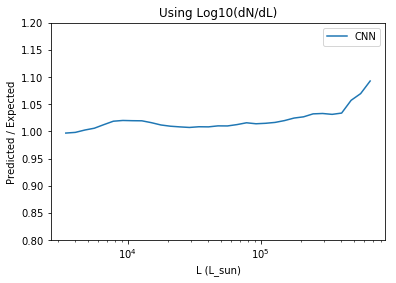

1690 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13843_rotate_0_subfield_15__Li_-1.788e-02_1.326e+00_-2.425e+00_2.874e-01_3.061e-01 ----------------------------
Error and MSE for the given base_number:
[0.0078162960708141327, 0.015688717365264893]


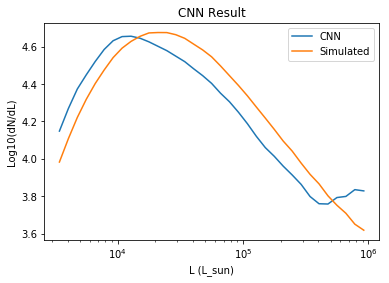

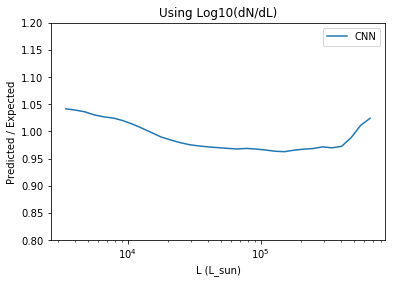

3516 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13849_rotate_0_subfield_21__Li_2.952e-02_1.347e+00_-1.836e+00_3.159e-01_3.046e-01 ----------------------------
Error and MSE for the given base_number:
[0.001355857471935451, 0.0027144053019583225]


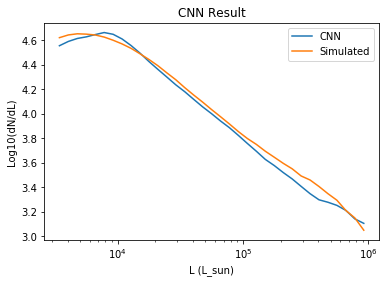

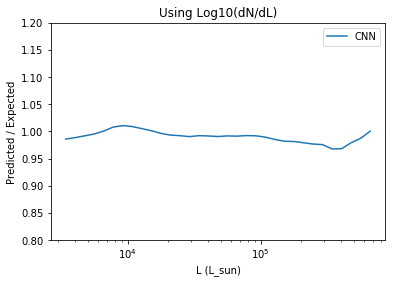

4891 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13677_rotate_0_subfield_22__Li_-5.810e-02_1.317e+00_-1.451e+00_3.007e-01_3.141e-01 ----------------------------
Error and MSE for the given base_number:
[0.041990343481302261, 0.085746109485626221]


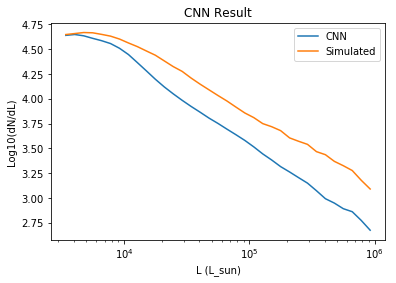

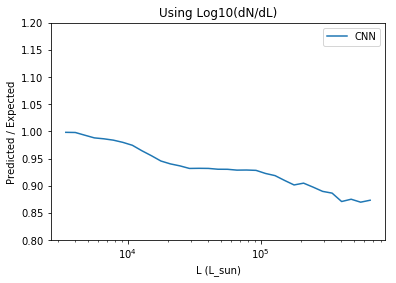

4988 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13741_rotate_0_subfield_14__Li_-3.455e-02_1.356e+00_-1.898e+00_2.987e-01_3.254e-01 ----------------------------
Error and MSE for the given base_number:
[0.0018487793859094381, 0.0037039211019873619]


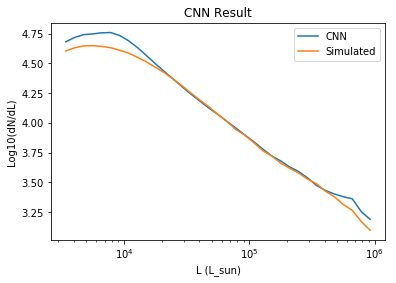

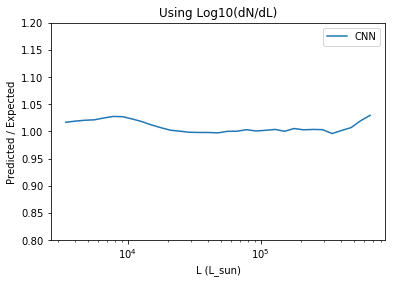

In [135]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_resnet_less_lums, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=less_lums,
                                           make_map_noisy=11, add_foregrounds=False,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=less_lums)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=less_lums)

178 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13753_rotate_0_subfield_2__Li_-1.486e-02_1.322e+00_-2.148e+00_2.903e-01_2.872e-01 ----------------------------
Error and MSE for the given base_number:
[0.030198635533452034, 0.061535932123661041]


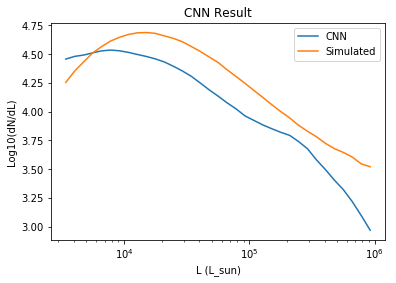

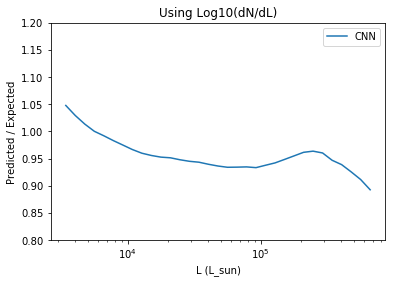

4193 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13609_rotate_0_subfield_35__Li_1.144e-02_1.362e+00_-1.767e+00_3.036e-01_3.034e-01 ----------------------------
Error and MSE for the given base_number:
[0.016415795311331749, 0.033133231103420258]


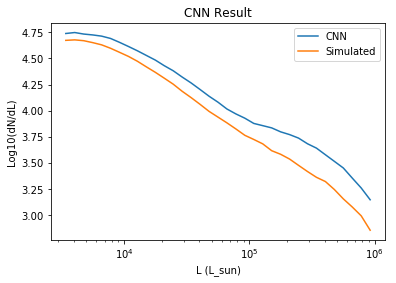

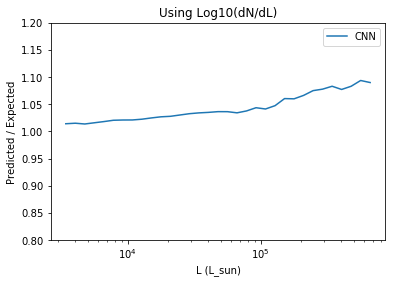

3087 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13889_rotate_0_subfield_20__Li_3.733e-02_1.366e+00_-1.273e+00_2.987e-01_3.016e-01 ----------------------------
Error and MSE for the given base_number:
[0.0061586140654981136, 0.012407652102410793]


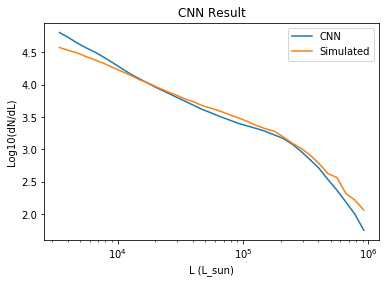

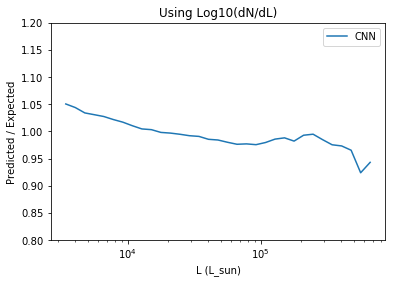

1449 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13729_rotate_0_subfield_35__Li_-5.175e-02_1.383e+00_-1.917e+00_3.037e-01_2.884e-01 ----------------------------
Error and MSE for the given base_number:
[0.00071715284138917923, 0.0014350933488458395]


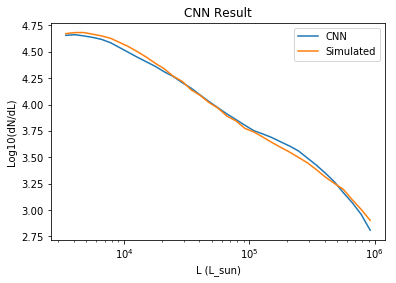

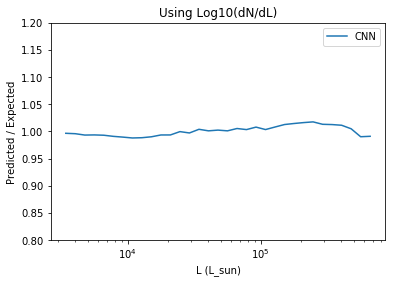

453 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13675_rotate_0_subfield_8__Li_-2.463e-02_1.391e+00_-1.662e+00_3.120e-01_3.057e-01 ----------------------------
Error and MSE for the given base_number:
[0.0005231244140304625, 0.0010471015702933073]


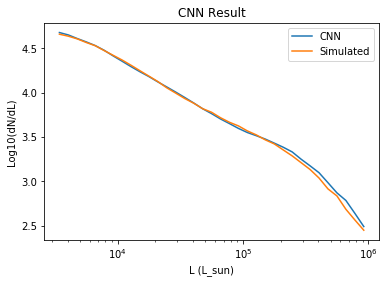

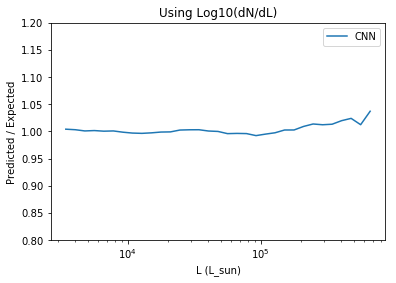

5648 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13629_rotate_0_subfield_12__Li_3.562e-02_1.343e+00_-1.781e+00_3.141e-01_3.090e-01 ----------------------------
Error and MSE for the given base_number:
[0.02996123768389225, 0.061290796846151352]


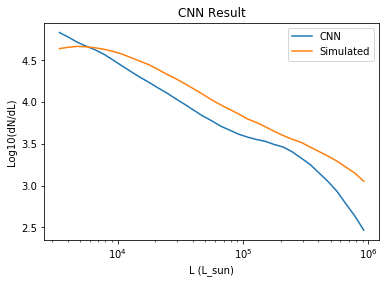

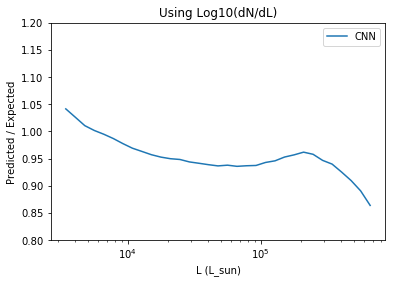

In [27]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_random_resnet_less_lums, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=less_lums,
                                           make_map_noisy=(0,20), add_foregrounds=False,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=less_lums)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=less_lums)

### Just Foreground

445 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13753_rotate_0_subfield_9__Li_3.994e-02_1.406e+00_-1.408e+00_3.030e-01_2.998e-01 ----------------------------
Error and MSE for the given base_number:
[0.014245046302676201, 0.029149293899536133]


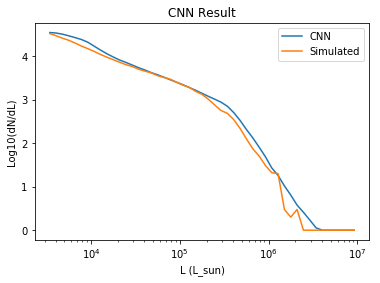

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: invalid value encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


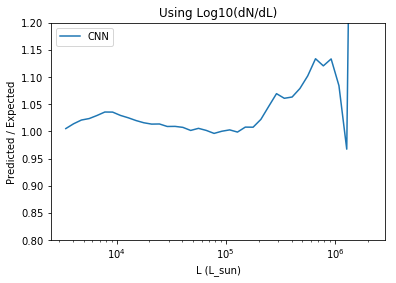

4459 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13631_rotate_0_subfield_6__Li_5.178e-02_1.377e+00_-1.821e+00_3.001e-01_3.022e-01 ----------------------------
Error and MSE for the given base_number:
[0.040627174079418182, 0.084606468677520752]


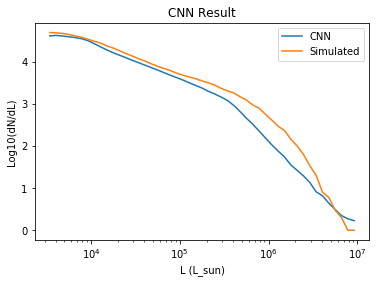

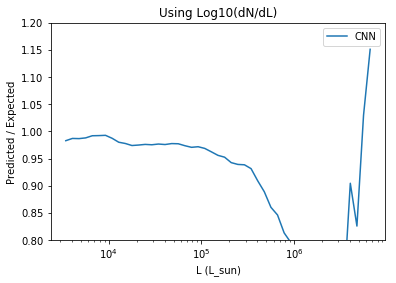

386 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13611_rotate_0_subfield_21__Li_6.196e-02_1.363e+00_-1.364e+00_2.987e-01_2.962e-01 ----------------------------
Error and MSE for the given base_number:
[0.014745445922017097, 0.030178919434547424]


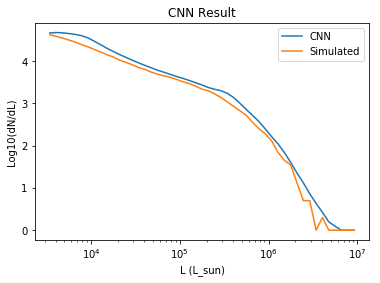

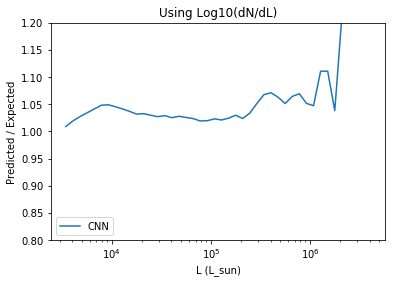

59 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13769_rotate_0_subfield_0__Li_1.805e-02_1.338e+00_-1.958e+00_3.058e-01_3.010e-01 ----------------------------
Error and MSE for the given base_number:
[0.089884988963603973, 0.19384925067424774]


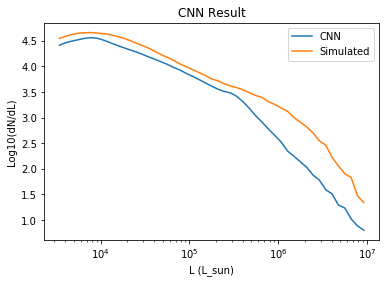

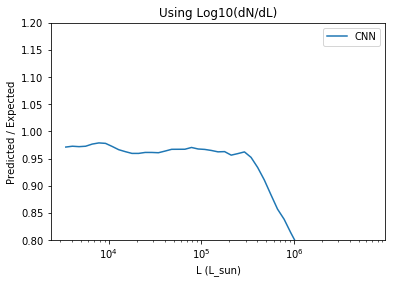

4280 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13875_rotate_0_subfield_28__Li_2.609e-02_1.329e+00_-1.976e+00_2.880e-01_2.938e-01 ----------------------------
Error and MSE for the given base_number:
[0.058417052030563354, 0.12118495255708694]


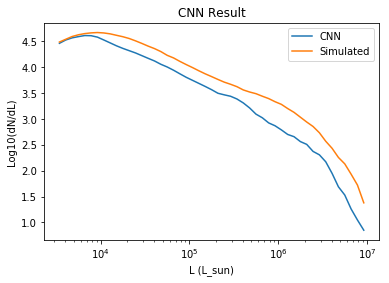

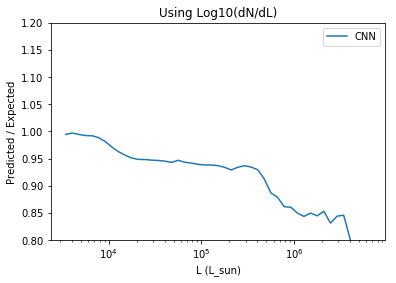

4237 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13829_rotate_0_subfield_5__Li_-3.944e-03_1.287e+00_-1.706e+00_3.049e-01_3.022e-01 ----------------------------
Error and MSE for the given base_number:
[0.046213161200284958, 0.094419673085212708]


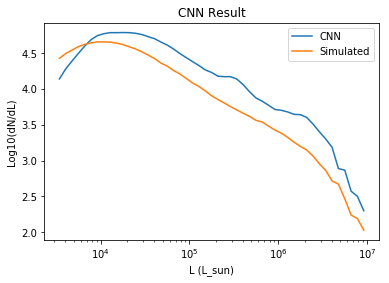

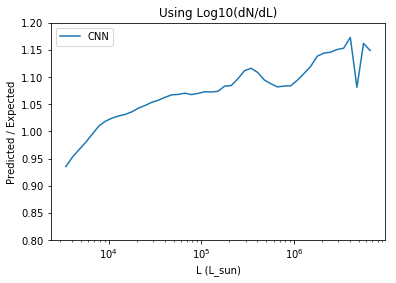

In [15]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(foreground_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=0, add_foregrounds=True,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

1607 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13811_rotate_0_subfield_18__Li_3.129e-03_1.356e+00_-2.161e+00_3.113e-01_2.938e-01 ----------------------------
Error and MSE for the given base_number:
[0.0062548201531171799, 0.012570112012326717]


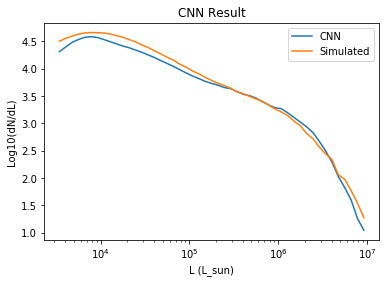

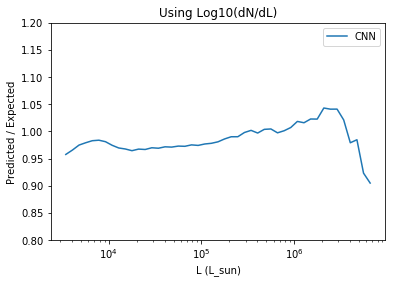

1696 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13709_rotate_0_subfield_1__Li_-2.563e-02_1.310e+00_-1.777e+00_3.112e-01_3.080e-01 ----------------------------
Error and MSE for the given base_number:
[0.046672243624925613, 0.097561746835708618]


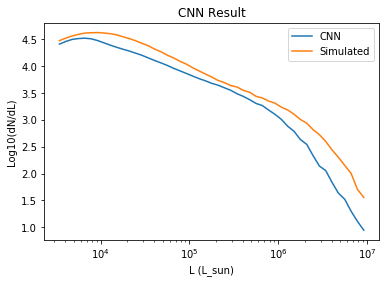

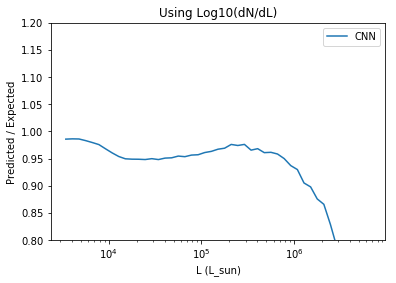

5233 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13661_rotate_0_subfield_29__Li_2.405e-02_1.403e+00_-2.360e+00_3.043e-01_3.027e-01 ----------------------------
Error and MSE for the given base_number:
[0.015923153609037399, 0.032096456736326218]


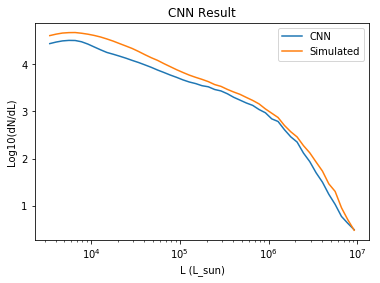

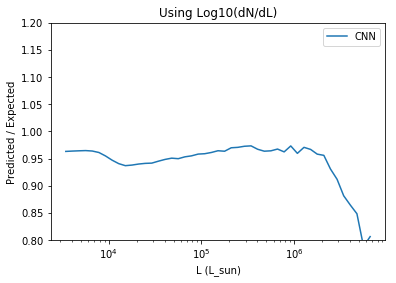

1561 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13773_rotate_0_subfield_7__Li_-1.415e-02_1.380e+00_-1.624e+00_3.063e-01_3.149e-01 ----------------------------
Error and MSE for the given base_number:
[0.019667835906147957, 0.040579695254564285]


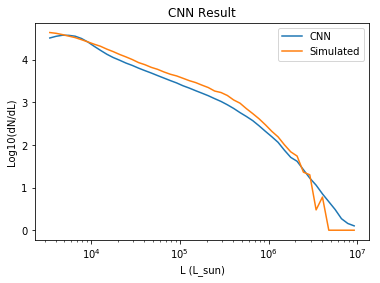

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


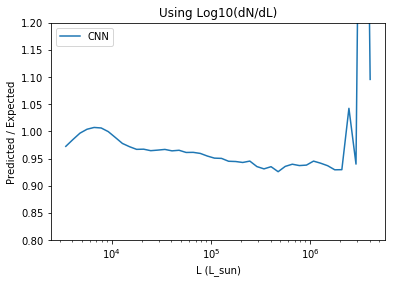

5335 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13681_rotate_0_subfield_27__Li_3.212e-02_1.324e+00_-2.405e+00_2.971e-01_2.974e-01 ----------------------------
Error and MSE for the given base_number:
[0.024261588230729103, 0.049564555287361145]


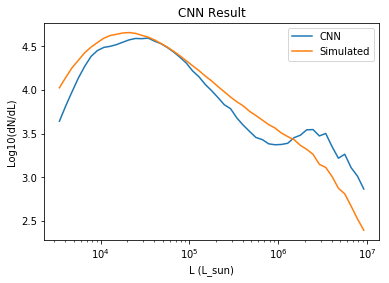

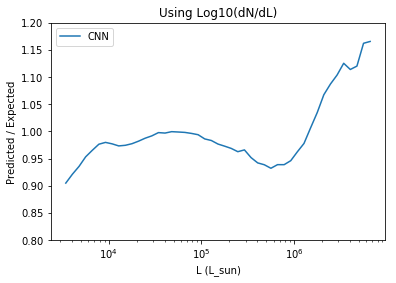

312 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13803_rotate_0_subfield_16__Li_-1.609e-02_1.337e+00_-1.490e+00_3.061e-01_3.005e-01 ----------------------------
Error and MSE for the given base_number:
[0.035712435841560364, 0.072914622724056244]


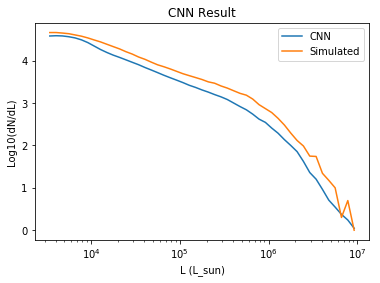

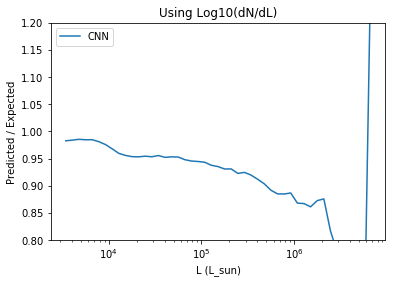

In [16]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=0, add_foregrounds=True,
                                           random_foreground_params=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

5627 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13685_rotate_0_subfield_28__Li_3.122e-04_1.384e+00_-2.353e+00_2.955e-01_2.891e-01 ----------------------------
Error and MSE for the given base_number:
[0.010918724350631237, 0.021965239197015762]


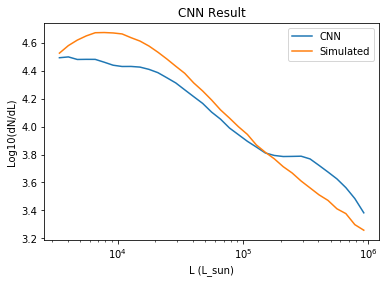

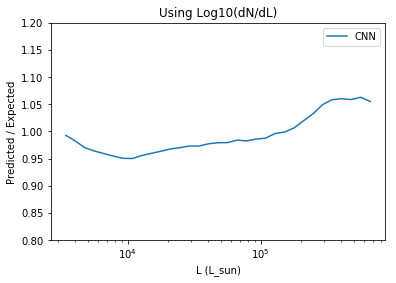

1081 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13853_rotate_0_subfield_29__Li_2.752e-02_1.357e+00_-2.023e+00_3.067e-01_3.063e-01 ----------------------------
Error and MSE for the given base_number:
[0.0039112688973546028, 0.0078438334167003632]


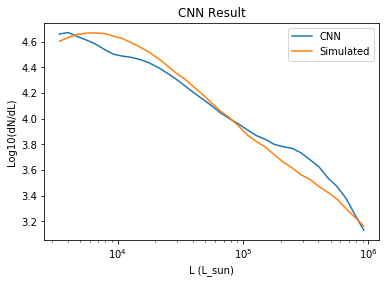

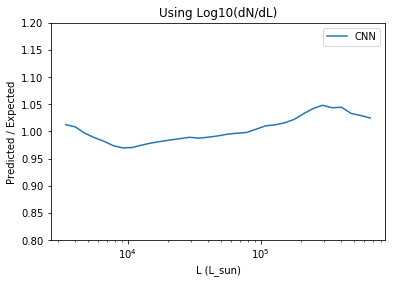

5054 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13595_rotate_0_subfield_9__Li_-1.176e-04_1.391e+00_-1.841e+00_3.008e-01_3.050e-01 ----------------------------
Error and MSE for the given base_number:
[0.0058939778245985508, 0.01182373333722353]


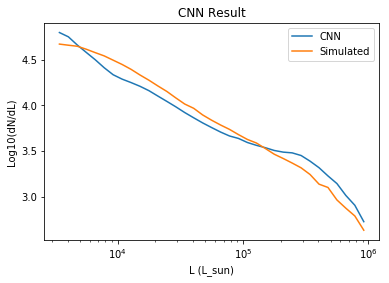

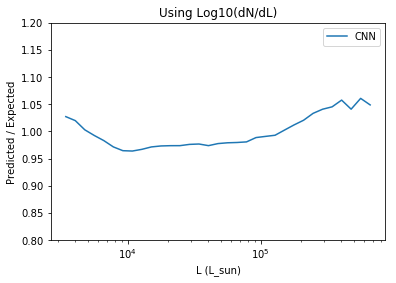

4510 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13631_rotate_0_subfield_10__Li_3.699e-02_1.327e+00_-1.336e+00_2.921e-01_2.987e-01 ----------------------------
Error and MSE for the given base_number:
[0.0023365668021142483, 0.0046845464967191219]


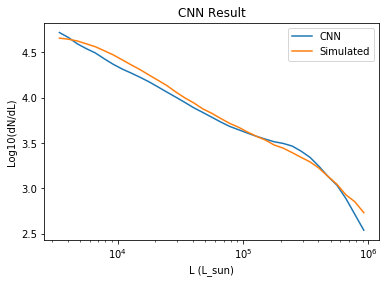

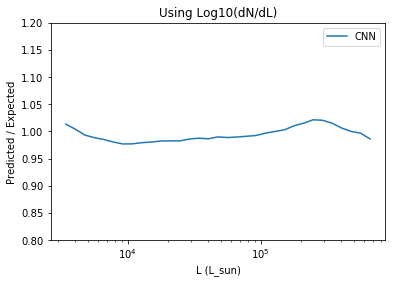

100 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13647_rotate_0_subfield_14__Li_1.392e-02_1.339e+00_-1.446e+00_2.952e-01_3.137e-01 ----------------------------
Error and MSE for the given base_number:
[0.020437603816390038, 0.04143529012799263]


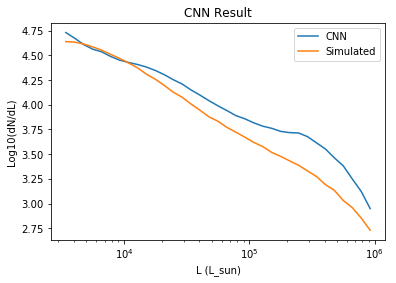

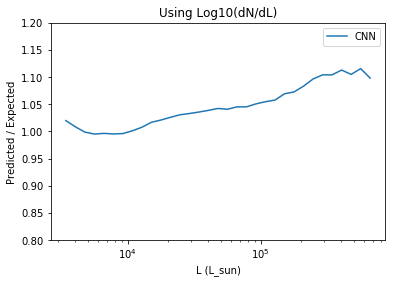

2349 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13823_rotate_0_subfield_18__Li_1.993e-02_1.353e+00_-1.447e+00_3.121e-01_3.026e-01 ----------------------------
Error and MSE for the given base_number:
[0.00090704817557707429, 0.001815778436139226]


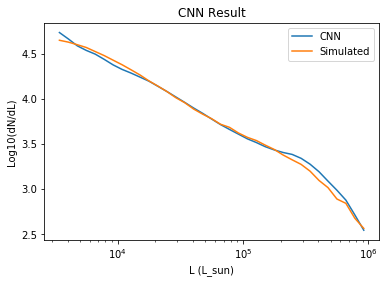

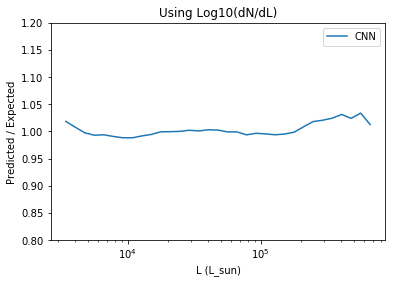

In [28]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(foreground_resnet_less_lums, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=less_lums,
                                           make_map_noisy=0, add_foregrounds=True,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=less_lums)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=less_lums)

1135 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13581_rotate_0_subfield_22__Li_-1.778e-02_1.377e+00_-1.653e+00_2.988e-01_3.030e-01 ----------------------------
Error and MSE for the given base_number:
[0.0062355874106287956, 0.012677803635597229]


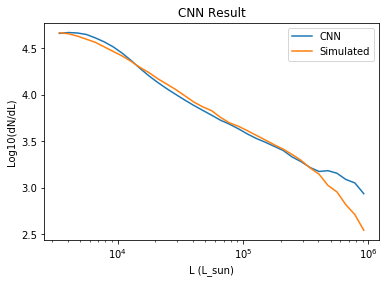

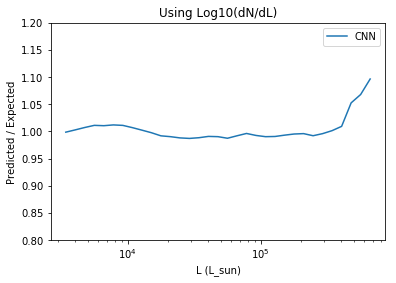

5538 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13725_rotate_0_subfield_28__Li_2.878e-02_1.389e+00_-1.660e+00_2.909e-01_3.098e-01 ----------------------------
Error and MSE for the given base_number:
[0.0030544893816113472, 0.0061199087649583817]


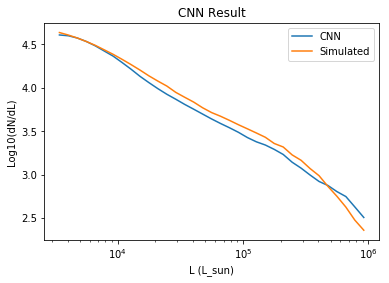

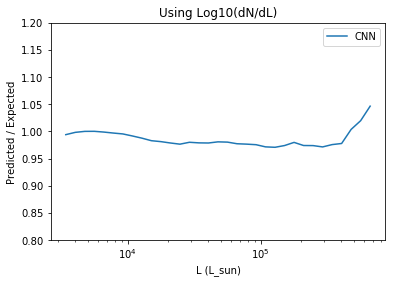

4981 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13615_rotate_0_subfield_1__Li_2.050e-02_1.336e+00_-1.479e+00_2.855e-01_3.104e-01 ----------------------------
Error and MSE for the given base_number:
[0.0016833662521094084, 0.0033729292917996645]


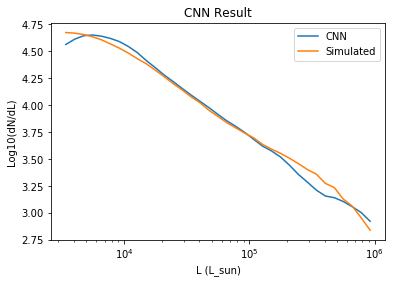

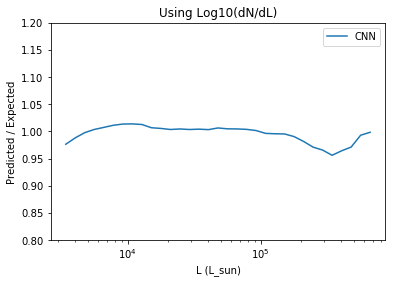

2496 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13593_rotate_0_subfield_2__Li_8.578e-03_1.287e+00_-1.938e+00_2.936e-01_3.075e-01 ----------------------------
Error and MSE for the given base_number:
[0.022434068843722343, 0.046602848917245865]


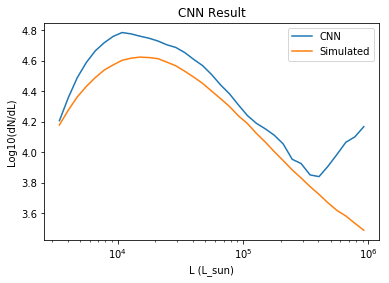

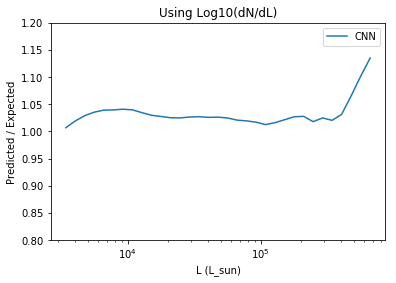

5309 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13853_rotate_0_subfield_11__Li_-1.291e-02_1.347e+00_-4.216e-01_2.996e-01_2.941e-01 ----------------------------
Error and MSE for the given base_number:
[0.068787850439548492, 0.15021339058876038]


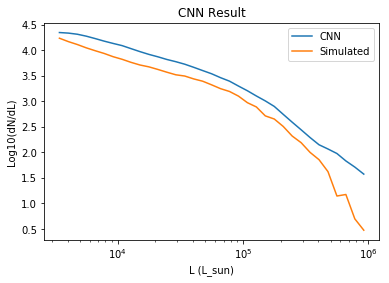

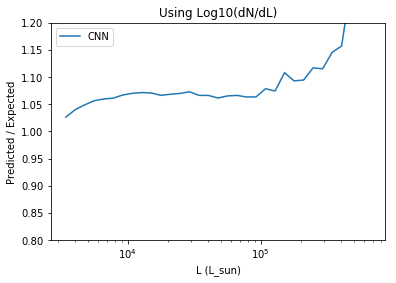

5335 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13681_rotate_0_subfield_27__Li_3.212e-02_1.324e+00_-2.405e+00_2.971e-01_2.974e-01 ----------------------------
Error and MSE for the given base_number:
[0.01408018171787262, 0.028850184753537178]


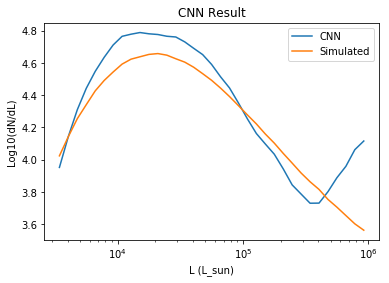

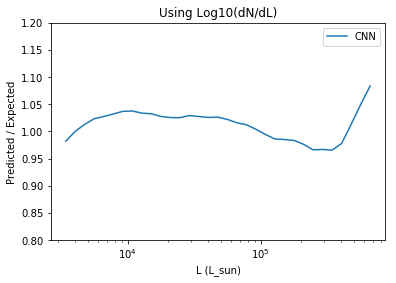

In [29]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(foreground_random_resnet_less_lums, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=less_lums,
                                           make_map_noisy=0, add_foregrounds=True,
                                           random_foreground_params=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=less_lums)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=less_lums)

### Noise + Foregrounds

3430 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13835_rotate_0_subfield_5__Li_-2.103e-02_1.407e+00_-1.880e+00_2.986e-01_2.872e-01 ----------------------------
Error and MSE for the given base_number:
[0.0093437545001506805, 0.019016129896044731]


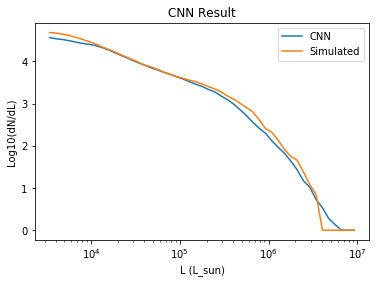

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: invalid value encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


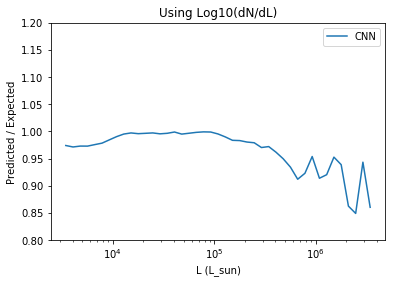

5295 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13725_rotate_0_subfield_14__Li_-5.043e-02_1.393e+00_-1.113e+00_3.043e-01_2.907e-01 ----------------------------
Error and MSE for the given base_number:
[0.020196504890918732, 0.041867483407258987]


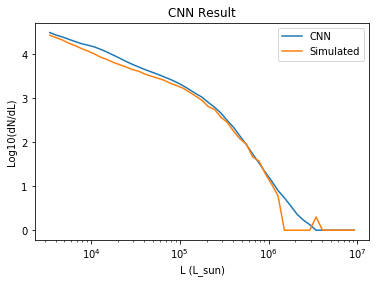

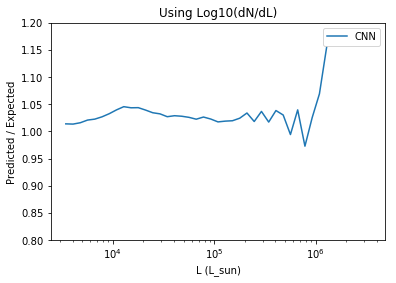

5560 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13651_rotate_0_subfield_15__Li_1.506e-02_1.351e+00_-1.662e+00_3.033e-01_3.059e-01 ----------------------------
Error and MSE for the given base_number:
[0.017535300925374031, 0.035554036498069763]


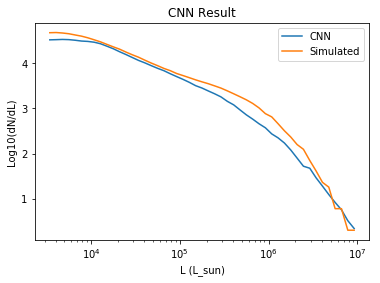

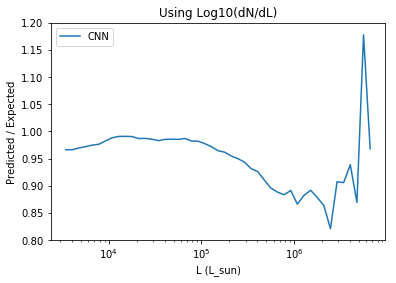

2622 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13607_rotate_0_subfield_3__Li_-3.680e-02_1.425e+00_-9.275e-01_3.047e-01_2.901e-01 ----------------------------
Error and MSE for the given base_number:
[0.27111884951591492, 0.64374047517776489]


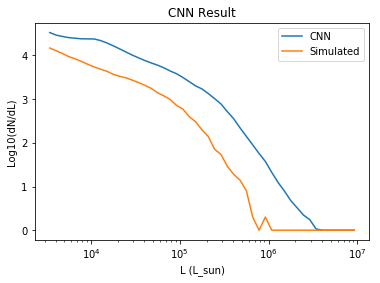

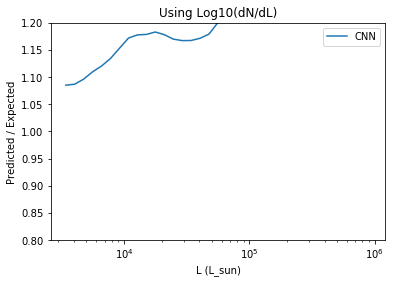

4682 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13697_rotate_0_subfield_3__Li_-1.606e-02_1.360e+00_-1.872e+00_3.069e-01_3.294e-01 ----------------------------
Error and MSE for the given base_number:
[0.074234358966350555, 0.15607421100139618]


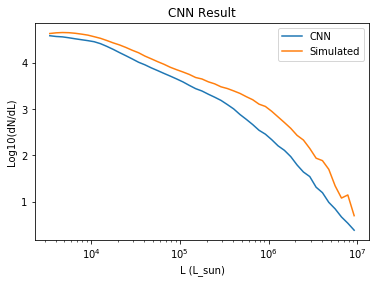

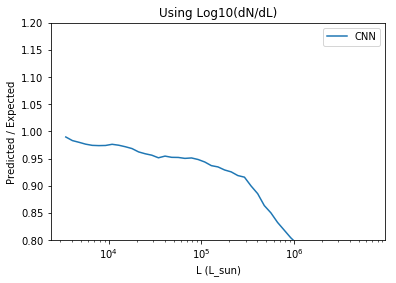

4431 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13857_rotate_0_subfield_22__Li_1.575e-02_1.347e+00_-1.973e+00_2.807e-01_3.108e-01 ----------------------------
Error and MSE for the given base_number:
[0.014742720872163773, 0.029938302934169769]


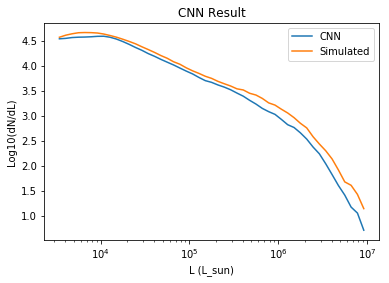

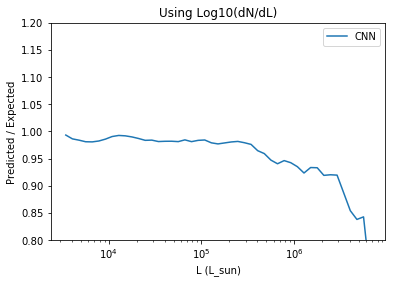

In [17]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=11, add_foregrounds=True,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

2475 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13865_rotate_0_subfield_16__Li_1.026e-02_1.448e+00_-1.408e+00_3.183e-01_2.998e-01 ----------------------------
Error and MSE for the given base_number:
[0.21676485240459442, 0.49615657329559326]


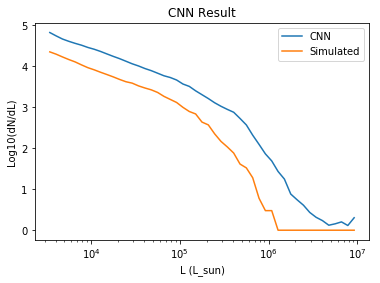

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


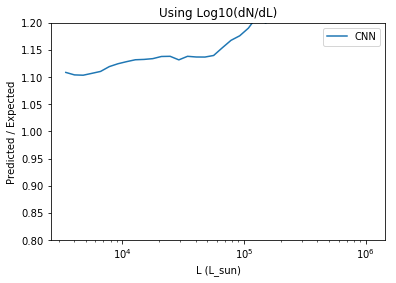

5644 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13631_rotate_0_subfield_16__Li_2.336e-02_1.361e+00_-2.045e+00_3.124e-01_3.083e-01 ----------------------------
Error and MSE for the given base_number:
[0.048952069133520126, 0.10227908939123154]


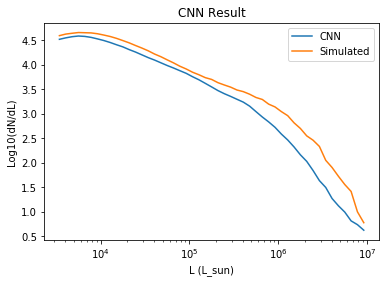

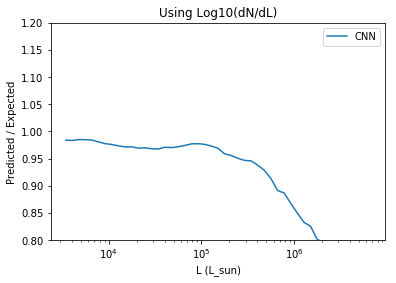

217 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13899_rotate_0_subfield_13__Li_3.510e-02_1.330e+00_-1.336e+00_3.063e-01_3.005e-01 ----------------------------
Error and MSE for the given base_number:
[0.039643377065658569, 0.08501078188419342]


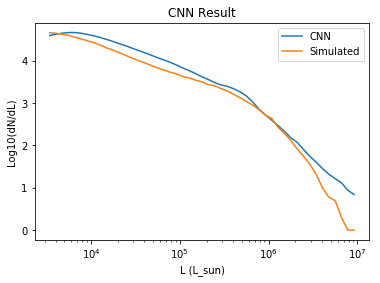

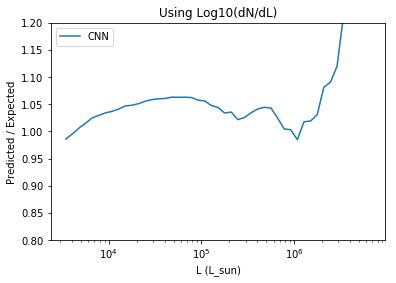

639 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13819_rotate_0_subfield_15__Li_5.758e-03_1.426e+00_-2.220e+00_2.972e-01_2.837e-01 ----------------------------
Error and MSE for the given base_number:
[0.044312234967947006, 0.094923742115497589]


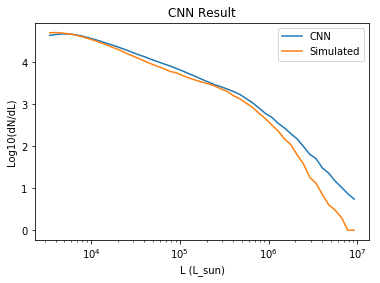

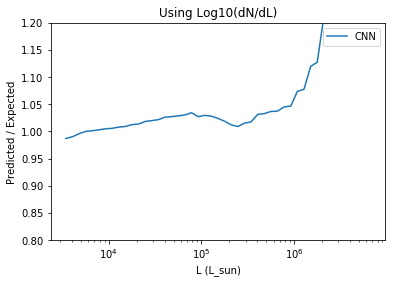

5601 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13589_rotate_0_subfield_8__Li_-1.980e-02_1.394e+00_-1.638e+00_2.803e-01_2.923e-01 ----------------------------
Error and MSE for the given base_number:
[0.078702710568904877, 0.17340792715549469]


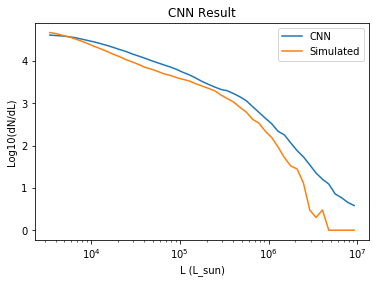

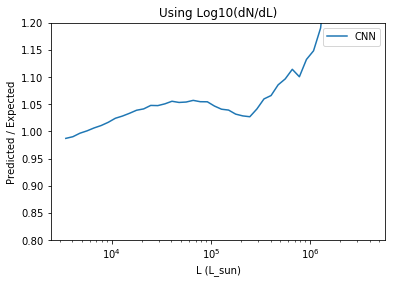

3998 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13721_rotate_0_subfield_16__Li_4.640e-02_1.433e+00_-2.035e+00_2.885e-01_2.933e-01 ----------------------------
Error and MSE for the given base_number:
[0.016760973259806633, 0.034752789884805679]


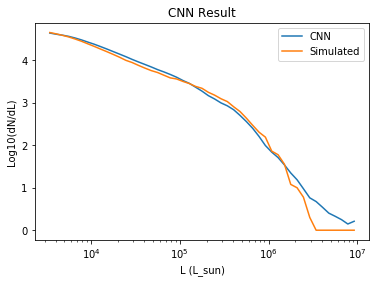

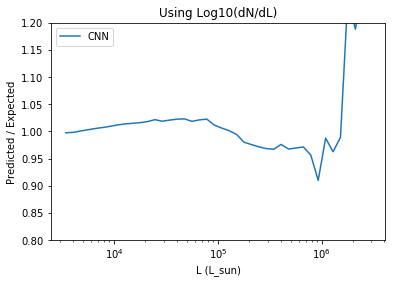

In [18]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                           make_map_noisy=(0,20), add_foregrounds=True,
                                           random_foreground_params=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

1395 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13729_rotate_0_subfield_6__Li_5.360e-02_1.373e+00_-1.078e+00_3.000e-01_2.987e-01 ----------------------------
Error and MSE for the given base_number:
[0.030113533139228821, 0.061727661639451981]


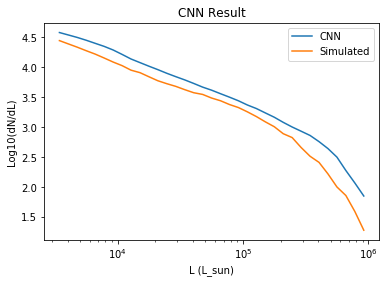

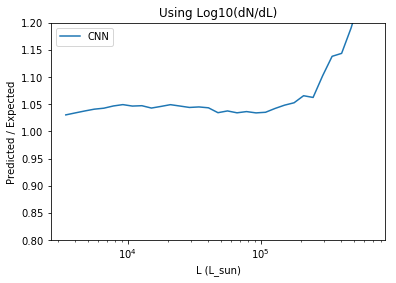

1751 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_14__Li_9.388e-03_1.318e+00_-2.580e+00_3.117e-01_2.963e-01 ----------------------------
Error and MSE for the given base_number:
[0.01766473799943924, 0.035980846732854843]


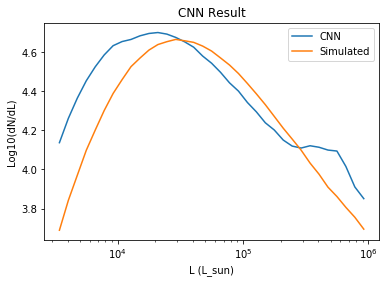

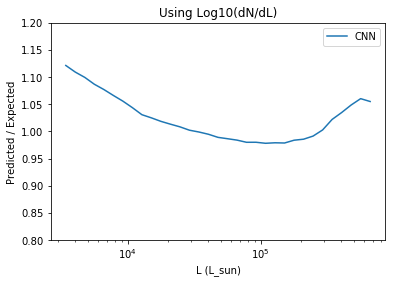

3263 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13843_rotate_0_subfield_8__Li_-5.756e-02_1.291e+00_-1.135e+00_3.076e-01_3.115e-01 ----------------------------
Error and MSE for the given base_number:
[0.0091507602483034134, 0.018420256674289703]


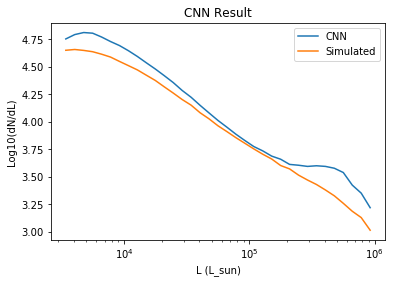

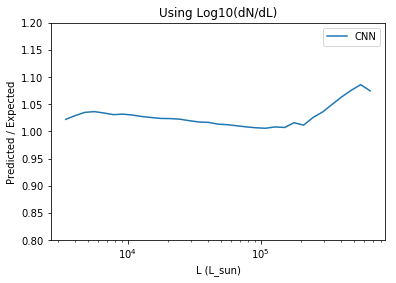

3264 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13721_rotate_0_subfield_29__Li_-2.530e-02_1.366e+00_-1.750e+00_3.173e-01_2.934e-01 ----------------------------
Error and MSE for the given base_number:
[0.0093303648754954338, 0.01882755383849144]


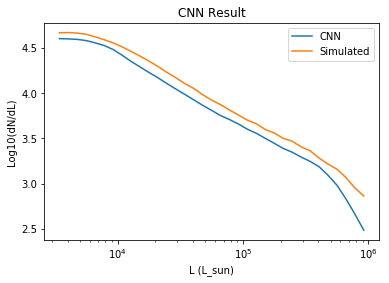

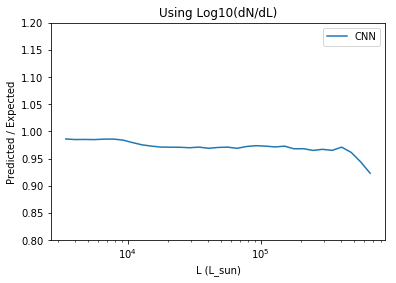

3430 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13835_rotate_0_subfield_5__Li_-2.103e-02_1.407e+00_-1.880e+00_2.986e-01_2.872e-01 ----------------------------
Error and MSE for the given base_number:
[0.0039230906404554844, 0.0078935930505394936]


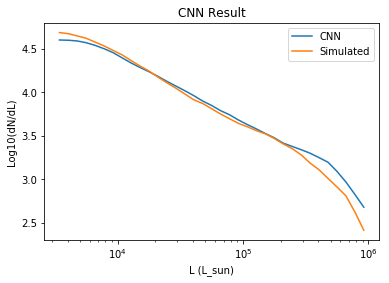

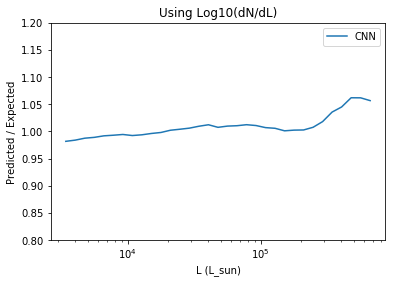

5721 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13723_rotate_0_subfield_15__Li_6.633e-03_1.321e+00_-1.331e+00_3.023e-01_3.147e-01 ----------------------------
Error and MSE for the given base_number:
[0.004207028541713953, 0.0084380330517888069]


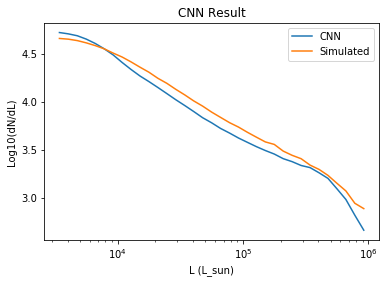

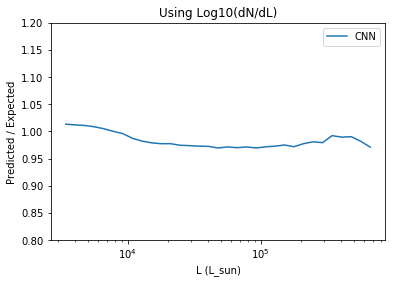

In [31]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_resnet_less_lums, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=less_lums,
                                           make_map_noisy=11, add_foregrounds=True,
                                           random_foreground_params=False)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=less_lums)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=less_lums)

5332 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13771_rotate_0_subfield_7__Li_1.155e-02_1.311e+00_-1.885e+00_3.217e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.0032304592896252871, 0.0064820260740816593]


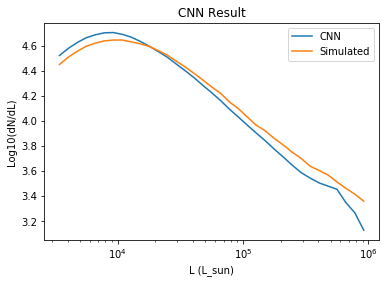

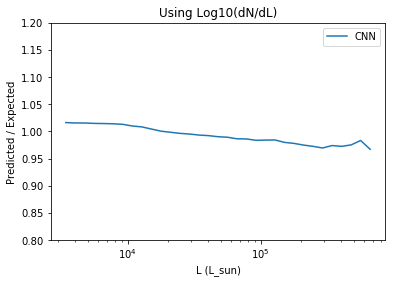

2577 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13589_rotate_0_subfield_24__Li_-3.287e-02_1.398e+00_-1.572e+00_2.971e-01_2.983e-01 ----------------------------
Error and MSE for the given base_number:
[0.0027822442352771759, 0.0055846767500042915]


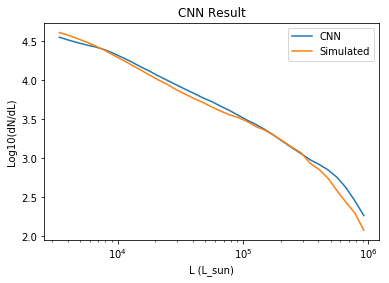

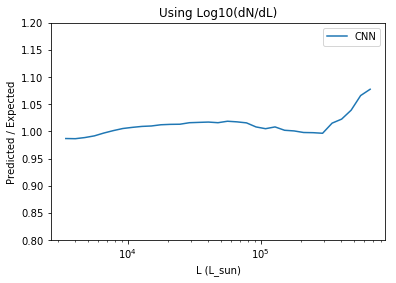

535 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13649_rotate_0_subfield_31__Li_1.052e-02_1.402e+00_-1.716e+00_2.872e-01_3.049e-01 ----------------------------
Error and MSE for the given base_number:
[0.025270193815231323, 0.051092807203531265]


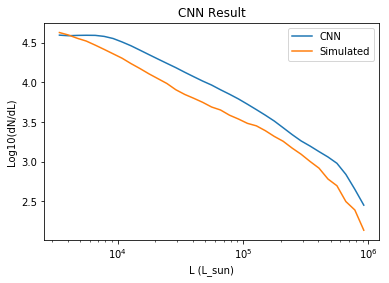

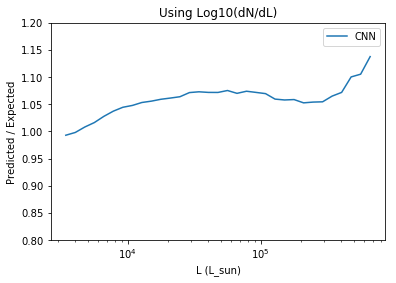

4545 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13581_rotate_0_subfield_12__Li_-1.177e-02_1.392e+00_-1.899e+00_3.155e-01_2.946e-01 ----------------------------
Error and MSE for the given base_number:
[0.0039314781315624714, 0.0078814970329403877]


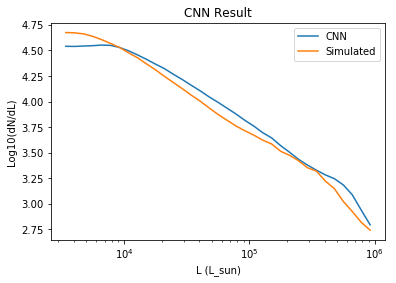

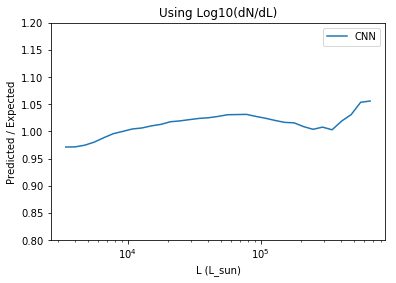

1104 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13775_rotate_0_subfield_28__Li_5.196e-02_1.403e+00_-1.456e+00_3.089e-01_2.757e-01 ----------------------------
Error and MSE for the given base_number:
[0.025850981473922729, 0.052585024386644363]


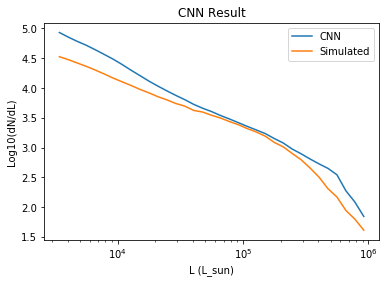

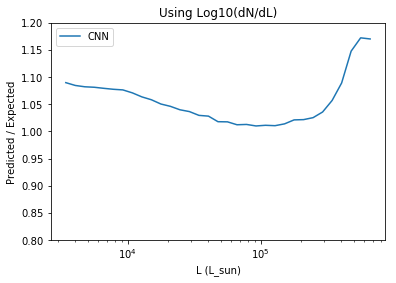

4813 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13841_rotate_0_subfield_21__Li_1.051e-02_1.348e+00_-1.587e+00_2.950e-01_2.964e-01 ----------------------------
Error and MSE for the given base_number:
[0.06937909871339798, 0.14681501686573029]


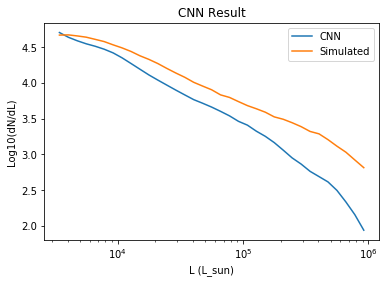

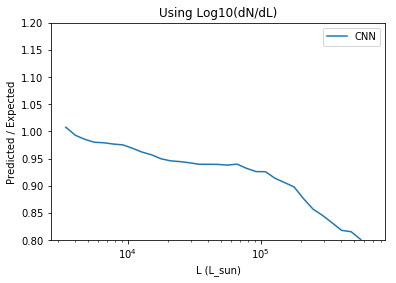

In [30]:
for numb in np.random.choice(range(len(random_small_Li_base)), 6):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet_less_lums, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=less_lums,
                                           make_map_noisy=(0,20), add_foregrounds=True,
                                           random_foreground_params=True)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=less_lums)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=less_lums)

# Test Rotational Invariance

In [120]:
%autoreload

In [130]:
rotate_loss = []
numb = -500
for i in range(100):
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True, rotate=i)
    
    rotate_loss.append(loss[0])
    

Error and MSE for the given base_number:
[0.013268280774354935, 0.026878764852881432]
Error and MSE for the given base_number:
[0.0093301506713032722, 0.019325166940689087]
Error and MSE for the given base_number:
[0.024243656545877457, 0.050148330628871918]
Error and MSE for the given base_number:
[0.012818212620913982, 0.025911131873726845]
Error and MSE for the given base_number:
[0.0046323551796376705, 0.0093376077711582184]
Error and MSE for the given base_number:
[0.015724930912256241, 0.032027155160903931]
Error and MSE for the given base_number:
[0.015361113473773003, 0.031187223270535469]
Error and MSE for the given base_number:
[0.0053008650429546833, 0.010857469402253628]
Error and MSE for the given base_number:
[0.097365081310272217, 0.20945331454277039]
Error and MSE for the given base_number:
[0.027525994926691055, 0.056225135922431946]
Error and MSE for the given base_number:
[0.014817668125033379, 0.031320400536060333]
Error and MSE for the given base_number:
[0.0060765

In [131]:
not_rotate_loss = []
numb = -500
for i in range(100):
    cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)
    
    not_rotate_loss.append(loss[0])
    

Error and MSE for the given base_number:
[0.090388715267181396, 0.19232955574989319]
Error and MSE for the given base_number:
[0.043163076043128967, 0.088275007903575897]
Error and MSE for the given base_number:
[0.024802371859550476, 0.051401630043983459]
Error and MSE for the given base_number:
[0.066352918744087219, 0.1407284289598465]
Error and MSE for the given base_number:
[0.0044831368140876293, 0.0090013016015291214]
Error and MSE for the given base_number:
[0.017128473147749901, 0.034875549376010895]
Error and MSE for the given base_number:
[0.019413994625210762, 0.04068635031580925]
Error and MSE for the given base_number:
[0.0239405557513237, 0.049295902252197266]
Error and MSE for the given base_number:
[0.022759230807423592, 0.046364370733499527]
Error and MSE for the given base_number:
[0.0105940792709589, 0.021624861285090446]
Error and MSE for the given base_number:
[0.039688874036073685, 0.081651784479618073]
Error and MSE for the given base_number:
[0.0148219196125864

In [134]:
print(np.mean(rotate_loss), np.std(rotate_loss))

0.0296574695292 0.0299814648293


In [135]:
print(np.mean(not_rotate_loss), np.std(not_rotate_loss))

0.0297472852771 0.0292677786911


1234 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_13__Li_-6.477e-03_1.379e+00_-1.899e+00_2.968e-01_2.989e-01 ----------------------------
Error and MSE for the given base_number:
[0.013026642613112926, 0.027534514665603638]


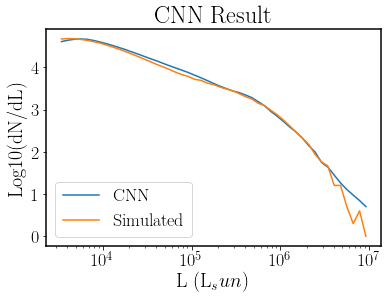

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:220: RuntimeWarning: divide by zero encountered in true_divide
  # ratio_smooth = avg/cur_lum


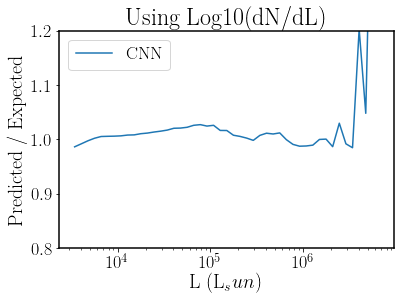

()

In [118]:
numb = 1234
print(numb, random_small_Li_base[numb], '----------------------------')

cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

1234 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_13__Li_-6.477e-03_1.379e+00_-1.899e+00_2.968e-01_2.989e-01 ----------------------------
Error and MSE for the given base_number:
[0.0093037812039256096, 0.019049379974603653]


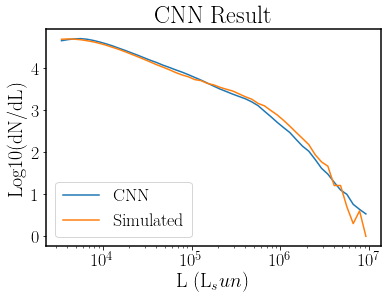

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:220: RuntimeWarning: divide by zero encountered in true_divide
  # ratio_smooth = avg/cur_lum


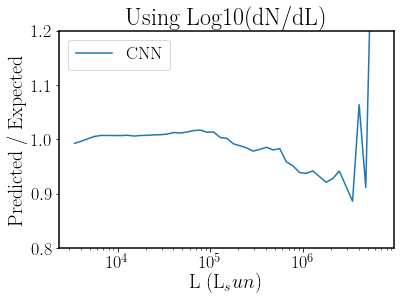

()

In [116]:
numb = 1234
print(numb, random_small_Li_base[numb], '----------------------------')

cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

1234 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_13__Li_-6.477e-03_1.379e+00_-1.899e+00_2.968e-01_2.989e-01 ----------------------------
Error and MSE for the given base_number:
[0.0092420075088739395, 0.018976734951138496]


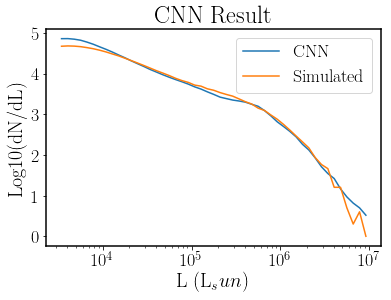

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:220: RuntimeWarning: divide by zero encountered in true_divide
  # ratio_smooth = avg/cur_lum


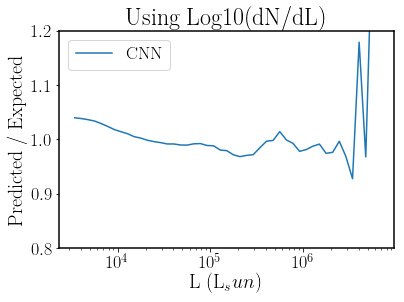

()

In [114]:
numb = 1234
print(numb, random_small_Li_base[numb], '----------------------------')

cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

1234 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_13__Li_-6.477e-03_1.379e+00_-1.899e+00_2.968e-01_2.989e-01 ----------------------------
Error and MSE for the given base_number:
[0.034464623779058456, 0.070865623652935028]


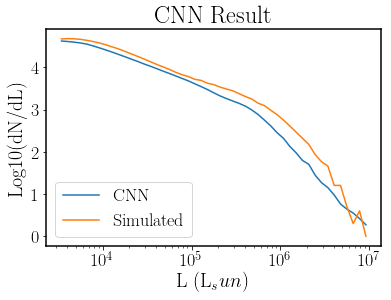

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:218: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


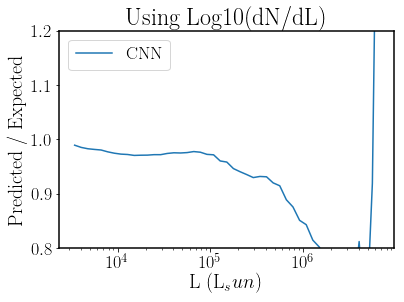

()

In [112]:
numb = 1234
print(numb, random_small_Li_base[numb], '----------------------------')

cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

1234 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_13__Li_-6.477e-03_1.379e+00_-1.899e+00_2.968e-01_2.989e-01 ----------------------------
Error and MSE for the given base_number:
[0.01413397490978241, 0.028950082138180733]


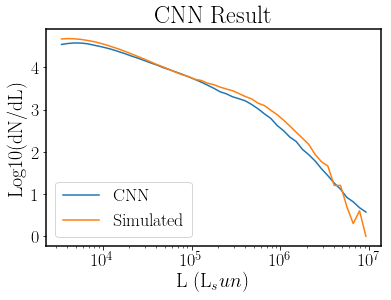

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:218: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


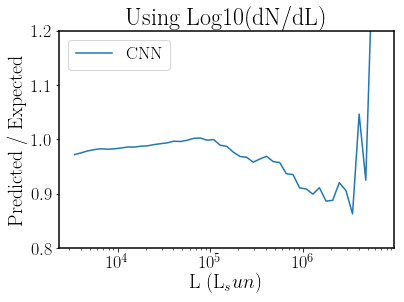

()

In [110]:
numb = 1234
print(numb, random_small_Li_base[numb], '----------------------------')

cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

1234 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_13__Li_-6.477e-03_1.379e+00_-1.899e+00_2.968e-01_2.989e-01 ----------------------------
Error and MSE for the given base_number:
[0.030872577801346779, 0.063684277236461639]


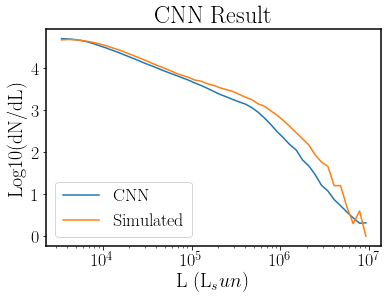

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/visualize.py:218: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0][:lum_func_size]/cur_lum[:lum_func_size]


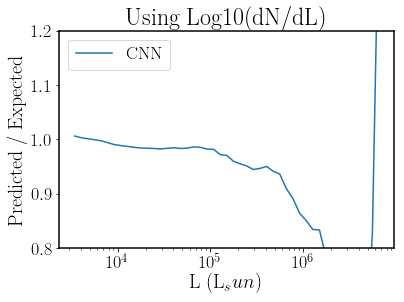

()

In [108]:
numb = 1234
print(numb, random_small_Li_base[numb], '----------------------------')

cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2, lum_func_size=lum_func_size)

# Error Bars on Prediction

In [5]:
numb = np.random.choice(range(len(random_small_Li_base)), 1)[0]

In [6]:
print(numb, random_small_Li_base[numb], '----------------------------')

cur_lum, cnn_lum, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)

2355 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13735_rotate_0_subfield_27__Li_-4.047e-02_1.346e+00_-2.202e+00_2.907e-01_2.947e-01 ----------------------------


NameError: name 'noisy_foreground_random_resnet' is not defined

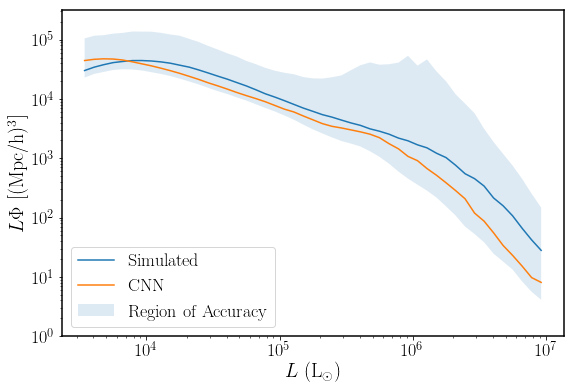

In [336]:
fig, ax = plt.subplots(figsize=(9, 6))

true_lum = 10**cur_lum
cnn_guess = 10**cnn_lum[0]

plt.plot(lumLogBinCents, true_lum, label='Simulated')
plt.plot(lumLogBinCents, cnn_guess, label='CNN')

conf = nfr_noisy_foreground_random_resnet_pred.transformed_res_conf_interval

plt.fill_between(lumLogBinCents, true_lum*(1+conf[:,0]), true_lum*(1+conf[:,1]), alpha=0.15, label='Region of Accuracy')

plt.xscale('log')
plt.yscale('log')
plt.ylim([1,10**5.5])
plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel('$L \Phi$ [(Mpc/h)$^3$]')
# # plt.title('Intrinsic Scatter of Simulated IMs')
plt.legend(loc='lower left')

plt.show(ax)
# plt.savefig('../figures/guess_range.pdf', bbox_inches='tight')

# Training History

In [5]:
%autoreload

### Full Model Training

In [6]:
noisy_resnet_history = lnn.get_full_history('noisy_resnet', modelLoc5)
noisy_random_resnet_history = lnn.get_full_history('noisy_random_resnet', modelLoc5)
foreground_resnet_history = lnn.get_full_history('foreground_resnet', modelLoc5)
foreground_random_resnet_history = lnn.get_full_history('foreground_random_resnet', modelLoc5)
noisy_foreground_resnet_history = lnn.get_full_history('noisy_foreground_resnet', modelLoc5)
noisy_foreground_random_resnet_history = lnn.get_full_history('noisy_foreground_random_resnet', modelLoc5)

noisy_resnet_history


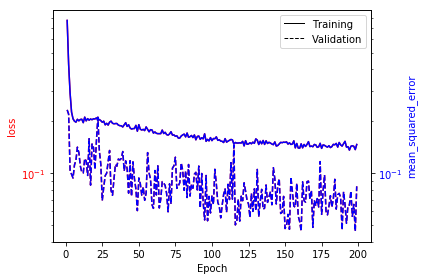

noisy_random_resnet_history


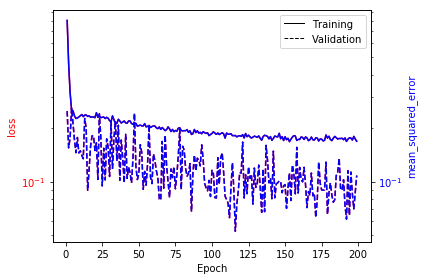

foreground_resnet_history


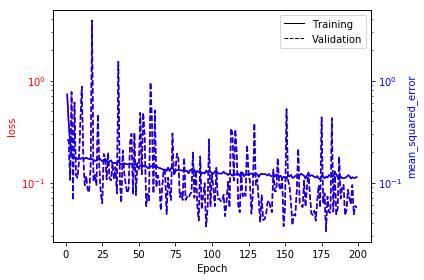

foreground_random_resnet_history


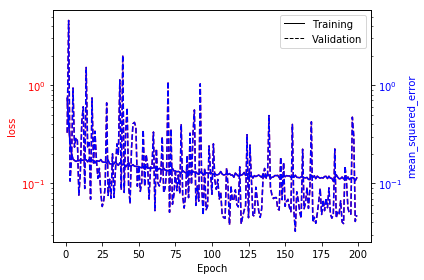

noisy_foreground_resnet_history


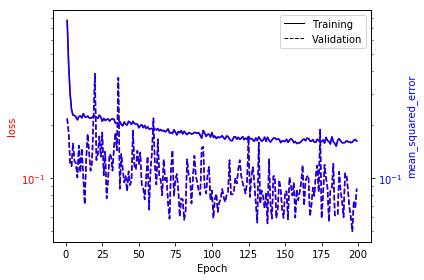

noisy_foreground_random_resnet_history


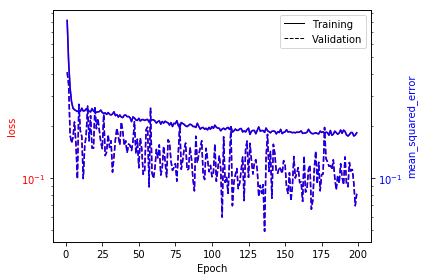

()

In [40]:
print('noisy_resnet_history')
lnn.history_compare_two_metrics(noisy_resnet_history, do_val=True)

print('noisy_random_resnet_history')
lnn.history_compare_two_metrics(noisy_random_resnet_history, do_val=True)

print('foreground_resnet_history')
lnn.history_compare_two_metrics(foreground_resnet_history, do_val=True)

print('foreground_random_resnet_history')
lnn.history_compare_two_metrics(foreground_random_resnet_history, do_val=True)

print('noisy_foreground_resnet_history')
lnn.history_compare_two_metrics(noisy_foreground_resnet_history, do_val=True)

print('noisy_foreground_random_resnet_history')
lnn.history_compare_two_metrics(noisy_foreground_random_resnet_history, do_val=True)

### Less Lum Model Training

In [7]:
noisy_resnet_less_lums_history = lnn.get_full_history('noisy_resnet_less_lums', modelLoc5)
noisy_random_resnet_less_lums_history = lnn.get_full_history('noisy_random_resnet_less_lums', modelLoc5)
foreground_resnet_less_lums_history = lnn.get_full_history('foreground_resnet_less_lums', modelLoc5)
foreground_random_resnet_less_lums_history = lnn.get_full_history('foreground_random_resnet_less_lums', modelLoc5)
noisy_foreground_resnet_less_lums_history = lnn.get_full_history('noisy_foreground_resnet_less_lums', modelLoc5)
noisy_foreground_random_resnet_less_lums_history = lnn.get_full_history('noisy_foreground_random_resnet_less_lums', modelLoc5)

noisy_resnet_less_lums_history


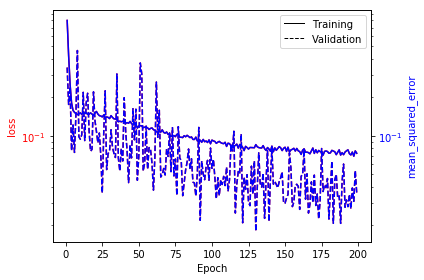

noisy_random_resnet_less_lums_history


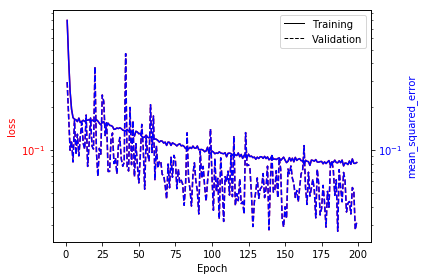

foreground_resnet_less_lums_history


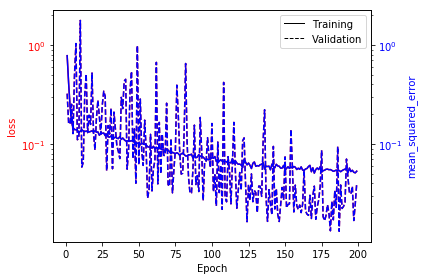

foreground_random_resnet_less_lums_history


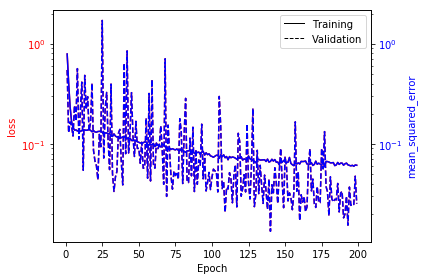

noisy_foreground_resnet_less_lums_history


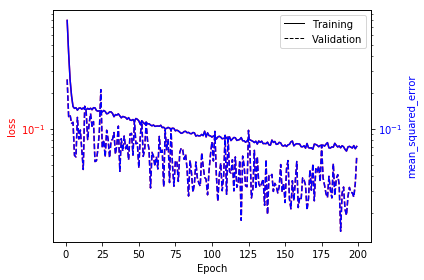

noisy_foreground_random_resnet_less_lums_history


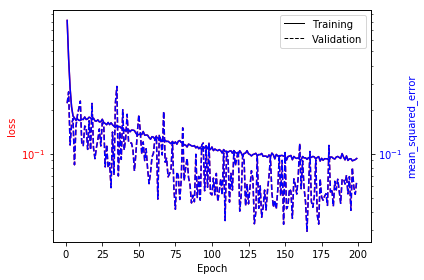

()

In [43]:
print('noisy_resnet_less_lums_history')
lnn.history_compare_two_metrics(noisy_resnet_less_lums_history, do_val=True)

print('noisy_random_resnet_less_lums_history')
lnn.history_compare_two_metrics(noisy_random_resnet_less_lums_history, do_val=True)

print('foreground_resnet_less_lums_history')
lnn.history_compare_two_metrics(foreground_resnet_less_lums_history, do_val=True)

print('foreground_random_resnet_less_lums_history')
lnn.history_compare_two_metrics(foreground_random_resnet_less_lums_history, do_val=True)

print('noisy_foreground_resnet_less_lums_history')
lnn.history_compare_two_metrics(noisy_foreground_resnet_less_lums_history, do_val=True)

print('noisy_foreground_random_resnet_less_lums_history')
lnn.history_compare_two_metrics(noisy_foreground_random_resnet_less_lums_history, do_val=True)

# Performance

In [5]:
%autoreload

## Load Power Spectrum Results

In [5]:
def load_power_data(file_name):
    data = np.loadtxt(file_name, delimiter=',')
    lum = sorted(data[:,0])
    phi = list(sorted(data[:,1], reverse=True))
    return(lum, phi)

def interpolate_power_data(lum, phi, min_val, max_val):
    f = interp1d(lum, phi)
    
    new_lum = np.logspace(min_val,max_val,50)
    new_phi = f(new_lum)
    
    return(new_lum, new_phi)

In [6]:
# Load Harvard's data (this was screen scraped)
file_upper = 'comap_power_data/upper_limit.txt'
file_lower = 'comap_power_data/lower_limit.txt'
file_simulated = 'comap_power_data/underlying.txt'

# Data is storaed individually for the best fit line, lower 95% interval and upper 95% interval
upper_lum, upper_phi = load_power_data(file_upper)
lower_lum, lower_phi = load_power_data(file_lower)
simulated_lum, simulated_phi = load_power_data(file_simulated)

# get min and max log value to generate luminosities to get everything based on the same luminosities
min_val = np.log10(max([upper_lum[0], lower_lum[0], simulated_lum[0]]))
max_val = np.log10(min([upper_lum[-1], lower_lum[-1], simulated_lum[-1]]))

# interpolate the data to get everything on the same set of underlying luminosities
upper_lum, upper_phi = interpolate_power_data(upper_lum, upper_phi, min_val, max_val)
lower_lum, lower_phi = interpolate_power_data(lower_lum, lower_phi, min_val, max_val)
simulated_lum, simulated_phi = interpolate_power_data(simulated_lum, simulated_phi, min_val, max_val)

# Harvard's data is 
conversion_to_make_Harvards_data_match_mine = 10**6.3342749483296803
upper_phi = upper_phi * conversion_to_make_Harvards_data_match_mine
lower_phi = lower_phi * conversion_to_make_Harvards_data_match_mine
simulated_phi = simulated_phi * conversion_to_make_Harvards_data_match_mine

upper_err = (upper_phi - simulated_phi)/2
lower_err = (simulated_phi - lower_phi)/2

log_upper_err = upper_err / simulated_phi / np.log(10)
log_lower_err = lower_err / simulated_phi / np.log(10)
log_simulated_phi = np.log10(simulated_phi)

upper_ratio_log = log_upper_err/log_simulated_phi
lower_ratio_log = log_lower_err/log_simulated_phi
ratio = log_simulated_phi/log_simulated_phi

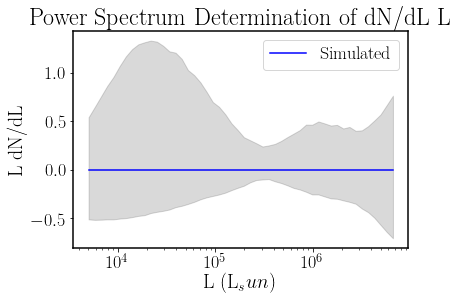

In [7]:
plt.plot(simulated_lum, 1-ratio, c='b', label='Simulated')
plt.fill_between(simulated_lum, -2*lower_err/simulated_phi, 2*upper_err/simulated_phi, alpha=0.15, color='k')

plt.xscale('log')
# plt.ylim([.8,1.2])
plt.xlabel('L (L_sun)')
plt.ylabel('L dN/dL')
plt.title('Power Spectrum Determination of dN/dL L')
plt.legend()

plt.show()

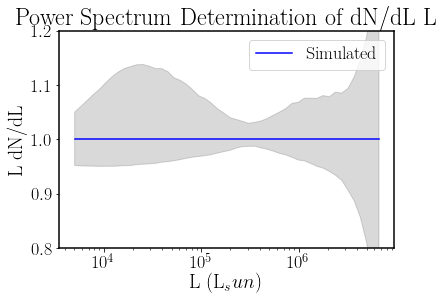

In [8]:
plt.plot(simulated_lum, ratio, c='b', label='Simulated')
plt.fill_between(simulated_lum, ratio - 2*lower_ratio_log, ratio + 2*upper_ratio_log, alpha=0.15, color='k')

plt.xscale('log')
plt.ylim([.8,1.2])
plt.xlabel('L (L_sun)')
plt.ylabel('L dN/dL')
plt.title('Power Spectrum Determination of dN/dL L')
plt.legend()

plt.show()

In [8]:
lumData = lnn.loadLums(base[0] + '_lum.npz', lumByproduct='log')

In [9]:
conversion = 10**lumData[3]/simulated_phi[0] * conversion_to_make_Harvards_data_match_mine
print(conversion)
print(1/conversion)

1892469.73412
5.28410035822e-07


In [11]:
# print(new_conv)
# print(conversion_to_make_Harvards_data_match_mine)

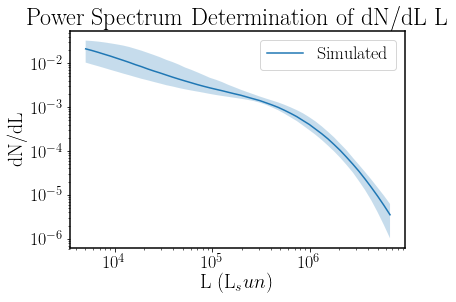

In [12]:
cc = conversion_to_make_Harvards_data_match_mine
plt.loglog(simulated_lum, simulated_phi/cc, label='Simulated')
plt.fill_between(simulated_lum, simulated_phi/cc-2*lower_err/cc, simulated_phi/cc+2*upper_err/cc, alpha=0.25)
# plt.loglog(lumLogBinCents, 10**lumData / conversion, label='Mine')

plt.xscale('log')
plt.xlabel('L (L_sun)')
plt.ylabel('dN/dL')
plt.title('Power Spectrum Determination of dN/dL L')
plt.legend()

plt.show()

## Get variance of Models

In [19]:
%autoreload

In [82]:
class Prediction:
    def __init__(self, predictions, label, conversion=1):
        self.predictions = predictions
        self.label = label
        self.keys = np.array(list(predictions.keys()))
        self.lum_func_size = len(self.predictions[self.keys[0]][0])
        
        self.res_ratio = []
        self.res_mean = []
        self.res_std = []
        
        self.res_median = []
        self.res_conf_interval = []
        
        self.conversion = conversion
        self.transformed_res_ratio = []
        self.transformed_res_mean = []
        self.transformed_res_std = []
        
        self.transformed_res_median = []
        self.transformed_res_conf_interval = []
        
        self.calculate_res()
        self.calculate_mean_std()
        self.calculate_confidence_interval()

    def calculate_res(self):
        # avoid dividing by 0
        res_ratio = np.zeros([len(self.keys), len(self.predictions[self.keys[0]][0])])
        for i, key in enumerate(self.keys):
            for j, val in enumerate(self.predictions[key][0]):
                if self.predictions[key][1][j] == 0.0 and self.predictions[key][0][j] != 0.0:
                    res_ratio[i,j] = None
                else:
                    res_ratio[i,j] = (self.predictions[key][0][j]-self.predictions[key][1][j]) / self.predictions[key][1][j]
                    
        transformed_res_ratio = np.zeros([len(self.keys), len(self.predictions[self.keys[0]][0])])
        for i, key in enumerate(self.keys):
            for j, val in enumerate(self.predictions[key][0]):
                transformed_res_ratio[i,j] = (10**self.predictions[key][0][j]-10**self.predictions[key][1][j]) / 10**self.predictions[key][1][j]
                    
        self.res_ratio = res_ratio
        self.transformed_res_ratio = transformed_res_ratio
    
        return(True)
    
    def calculate_mean_std(self):
        self.res_mean = np.nanmean(self.res_ratio, 0)
        self.res_std = np.nanstd(self.res_ratio, 0)
        
        self.transformed_res_mean = np.nanmean(self.transformed_res_ratio, 0)
        self.transformed_res_std = np.nanstd(self.transformed_res_ratio, 0)
        
        return(True)
    
    # confidence interval centered on median
    def calculate_confidence_interval(self, conf=0.95):
        for i, key in enumerate(self.res_ratio[0]):
            # sort list of residuals for a given luminosity
            sorted_res = np.array(sorted(self.res_ratio[:,i]))
            # remove nans if needed
            sorted_res = sorted(sorted_res[~np.isnan(sorted_res)])
            
            # get length of list to remove 5%
            map_numb = len(sorted_res)
            remove_maps = int(map_numb * (1-conf)/2)
            
            self.res_conf_interval.append([sorted_res[remove_maps], sorted_res[-remove_maps]])
            self.res_median.append(sorted_res[int(map_numb/2)])
            
        self.res_conf_interval = np.array(self.res_conf_interval)
        self.res_median = np.array(self.res_median)
        
        for i, key in enumerate(self.transformed_res_ratio[0]):
            # sort list of residuals for a given luminosity
            sorted_res = np.array(sorted(self.transformed_res_ratio[:,i]))
            # remove nans if needed
            sorted_res = sorted(sorted_res[~np.isnan(sorted_res)])
            
            # get length of list to remove 5%
            map_numb = len(sorted_res)
            remove_maps = int(map_numb * (1-conf)/2)
            
            self.transformed_res_conf_interval.append([sorted_res[remove_maps], sorted_res[-remove_maps]])
            self.transformed_res_median.append(sorted_res[int(map_numb/2)])
            
        self.transformed_res_conf_interval = np.array(self.transformed_res_conf_interval)
        self.transformed_res_median = np.array(self.transformed_res_median)
        
        return(True)               
        
    
# def plot_res_contour(res_list, lumLogBinCents, move_mean=True, use_std=True, alpha=0.25, lum_points=False, transformed=False,
#                     plot_range=None):
#     fig, ax = plt.subplots(figsize=(18, 9))
    
#     for i, res_pred in enumerate(res_list):
#         if move_mean == False:
#             if transformed:
#                 mean = np.zeros(len(res_pred.transformed_res_mean))
#             else:
#                 mean = np.zeros(len(res_pred.res_mean))
#                 ax.semilogx(lumLogBinCents[:res_pred.lum_func_size], mean)
#         else:
#             mean = res_pred.res_mean
#             if transformed:
#                 mean = mean = res_pred.transformed_res_mean
#             else:
#                 mean = res_pred.res_mean
                                
#         if transformed:
#             std = res_pred.transformed_res_std
#             conf_interval = np.array([res_pred.transformed_res_conf_interval[:,0], res_pred.transformed_res_conf_interval[:,1]])
#         else:
#             std = res_pred.res_std
#             conf_interval = np.array([res_pred.res_conf_interval[:,0], res_pred.res_conf_interval[:,1]])
                                
#         if use_std:
#             ax.fill_between(lumLogBinCents[:res_pred.lum_func_size], mean-2*std, 
#                              mean+2*std, alpha=alpha, label=res_pred.label)
#         else:
#             p = ax.fill_between(lumLogBinCents[:res_pred.lum_func_size], conf_interval[0], 
#                              conf_interval[1], alpha=alpha, label=res_pred.label)
#             color = p.get_facecolor()
#             ax.plot(lumLogBinCents[:res_pred.lum_func_size], conf_interval[1], color=color[0][:-1], linewidth=2.5)
#             ax.plot(lumLogBinCents[:res_pred.lum_func_size], conf_interval[0], color=color[0][:-1], linewidth=2.5)
            
#     if lum_points:
#         ax.scatter(lumLogBinCents, [0]*len(lumLogBinCents), s=100, marker='+', zorder=10, color='r', 
#                    label='Used Luminosity Points')
        
#     if plot_range is None:
#     #     ax.set_ylim([-0.2, 0.2])
#         ax.set_ylim([-1, 3])
#     else:
#         ax.set_ylim(plot_range)
#     ax.set_xscale('log')
#     ax.set_xlabel('L (L_sun)')

# #     plt.show(ax)
    
#     return(ax)

def plot_res_contour(ax, res_pred, lumLogBinCents, alpha=0.25, color=None, label=None):
    mean = np.zeros(len(res_pred.transformed_res_mean))

    std = res_pred.transformed_res_std
    conf_interval = np.array([res_pred.transformed_res_conf_interval[:,0], res_pred.transformed_res_conf_interval[:,1]])
    
    if label is None:
        label = res_pred.label

    if color is not None:
        p = ax.fill_between(lumLogBinCents[:res_pred.lum_func_size], conf_interval[0], 
                         conf_interval[1], alpha=alpha, label=label, facecolor=color)
    else:
        p = ax.fill_between(lumLogBinCents[:res_pred.lum_func_size], conf_interval[0], 
                         conf_interval[1], alpha=alpha, label=label)
    color = p.get_facecolor()
    ax.plot(lumLogBinCents[:res_pred.lum_func_size], conf_interval[1], color=color[0][:-1], linewidth=2.5)
    ax.plot(lumLogBinCents[:res_pred.lum_func_size], conf_interval[0], color=color[0][:-1], linewidth=2.5)
    
    return(ax)
        
def plot_res_contour_full(res_list, lumLogBinCents, alpha=0.25, colors=None, lum_points=False, plot_range=None):
    fig, ax = plt.subplots(figsize=(18, 9))
    
    for i, res_pred in enumerate(res_list):
        if colors is not None:
            color = colors[i]
        else:
            color = None
            
        plot_res_contour(ax, res_pred, lumLogBinCents, alpha=0.25, color=color)
        
    if lum_points:
        ax.scatter(lumLogBinCents, [0]*len(lumLogBinCents), s=100, marker='+', zorder=10, color='r', 
                   label='Used Luminosity Points')
        
    if plot_range is None:
    #     ax.set_ylim([-0.2, 0.2])
        ax.set_ylim([-1, 3])
    else:
        ax.set_ylim(plot_range)
        
    ax.set_xscale('log')
    ax.set_xlabel('L (L_sun)')
    
    return(ax)
    
    
        

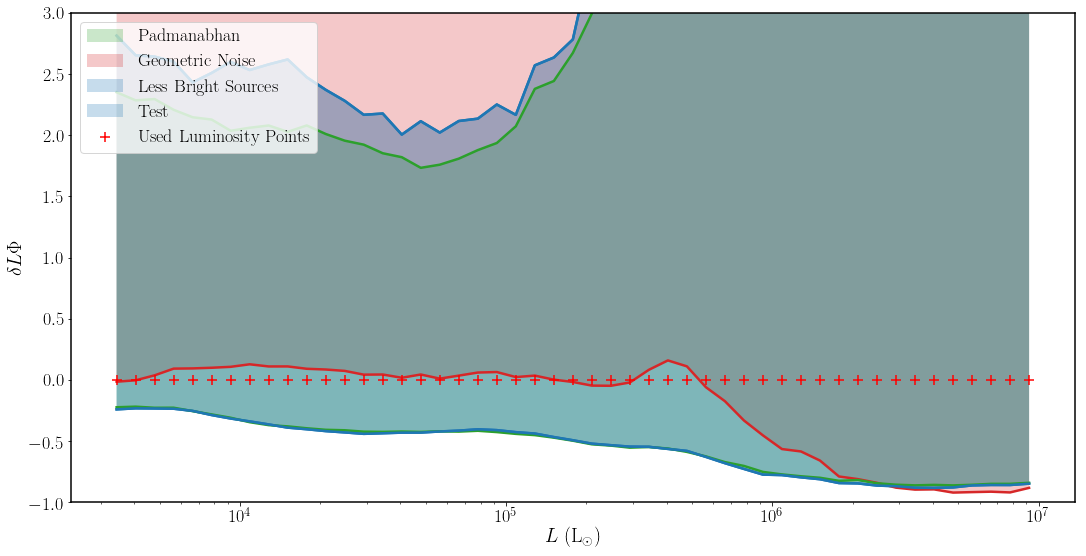

In [81]:
colors = ['tab:blue', 'tab:red', 'tab:green']

ax = plot_res_contour_full(res_list2, lumLogBinCents, lum_points=True, colors=colors)#plot_range=[-1, 9])

color = 'tab:blue'
plot_res_contour(ax, less_high_sources_pred, lumLogBinCents, alpha=0.25, color=color, label='Test')

handles, labels = ax.get_legend_handles_labels()
ordering = [2,1,0,4,3]
handles = [handles[i] for i in ordering]
labels = [labels[i] for i in ordering]
ax.legend(handles, labels, loc='upper left')

plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel(r'$\delta L \Phi$')
plt.show(ax)

## Fully Trained model on fiducial Li parameters

In [22]:
nfr_basic_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_basic_resnet_basic_Li')
nfr_basic_resnet_basic_Li_pred = Prediction(nfr_basic_resnet_basic_Li_p, 'No Noise')

nfr_noisy_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_resnet_basic_Li')
nfr_noisy_resnet_basic_Li_pred = Prediction(nfr_noisy_resnet_basic_Li_p, 'White Noise')

nfr_foreground_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_foreground_resnet_basic_Li')
nfr_foreground_resnet_basic_Li_pred = Prediction(nfr_foreground_resnet_basic_Li_p, 'Foreground Resnet')

nfr_noisy_foreground_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_resnet_basic_Li')
nfr_noisy_foreground_resnet_basic_Li_pred = Prediction(nfr_noisy_foreground_resnet_basic_Li_p, 'Noisy Foreground Resnet')

nfr_noisy_foreground_random_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_random_resnet_basic_Li')
nfr_noisy_foreground_random_resnet_basic_Li_pred = Prediction(nfr_noisy_foreground_random_resnet_basic_Li_p, 'Random White Noise and Foregrounds')

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


In [200]:
res_list2 = [nfr_basic_resnet_basic_Li_pred, 
             nfr_noisy_resnet_basic_Li_pred, nfr_foreground_resnet_basic_Li_pred]
res_list2.reverse()

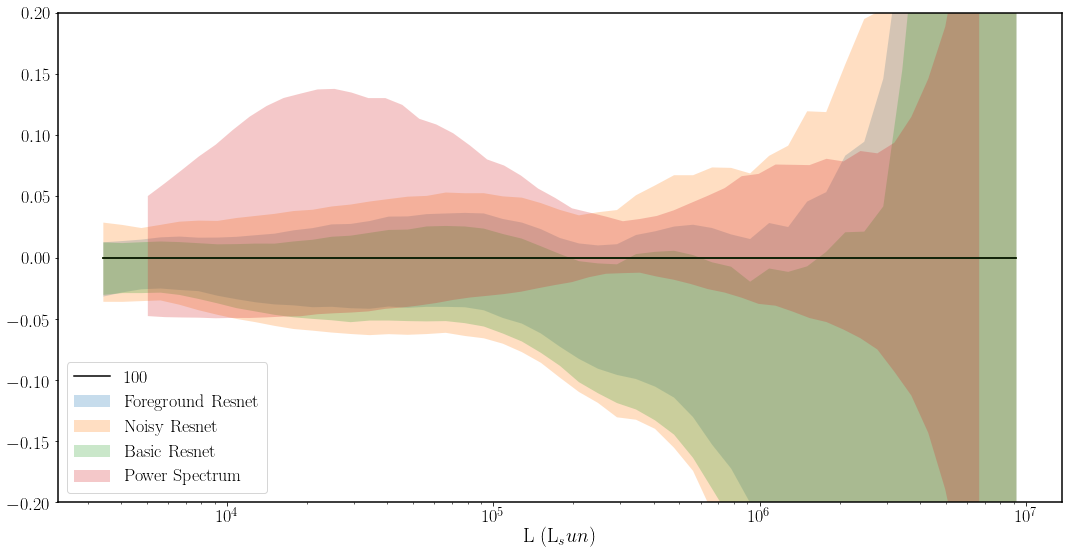

In [201]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

In [202]:
res_list2 = [nfr_basic_resnet_basic_Li_pred, 
             nfr_noisy_foreground_resnet_basic_Li_pred, nfr_noisy_foreground_random_resnet_basic_Li_pred]
res_list2.reverse()

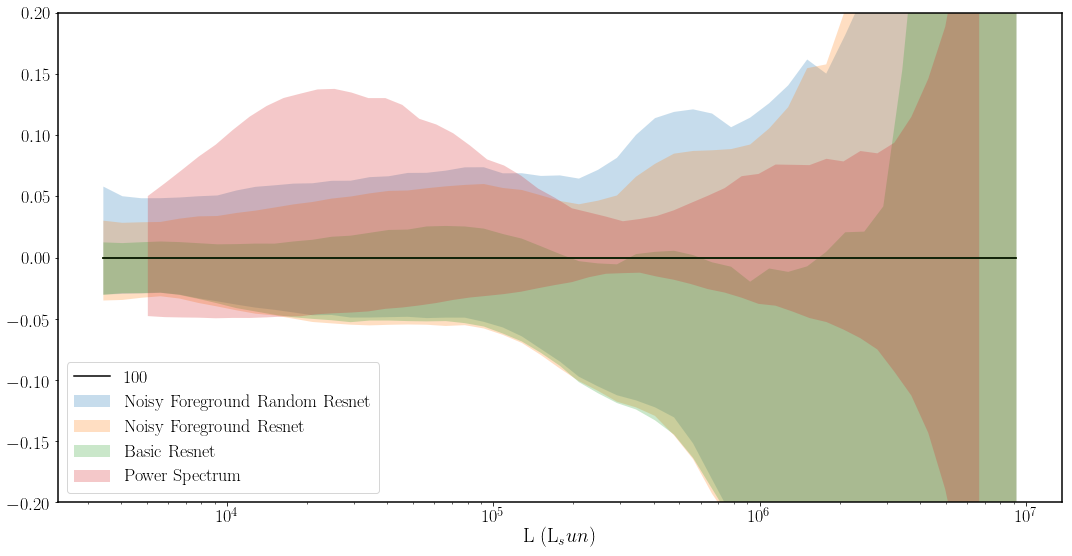

In [203]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

## Fully Trained model on random Li parameters

In [23]:
nfr_basic_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_basic_resnet')
nfr_basic_resnet_pred = Prediction(nfr_basic_resnet_p, 'No Noise')

nfr_noisy_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_resnet')
nfr_noisy_resnet_pred = Prediction(nfr_noisy_resnet_p, 'White Noise')

nfr_noisy_foreground_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_resnet')
nfr_noisy_foreground_resnet_pred = Prediction(nfr_noisy_foreground_resnet_p, 'Noisy Foreground Resnet')

nfr_foreground_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_foreground_resnet')
nfr_foreground_resnet_pred = Prediction(nfr_foreground_resnet_p, 'Foreground Resnet')

nfr_noisy_foreground_random_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_random_resnet')
nfr_noisy_foreground_random_resnet_pred = Prediction(nfr_noisy_foreground_random_resnet_p, 'Random White Noise and Foregrounds')

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


In [205]:
res_list2 = [nfr_basic_resnet_pred, nfr_noisy_resnet_pred, nfr_foreground_resnet_pred]
res_list2.reverse()

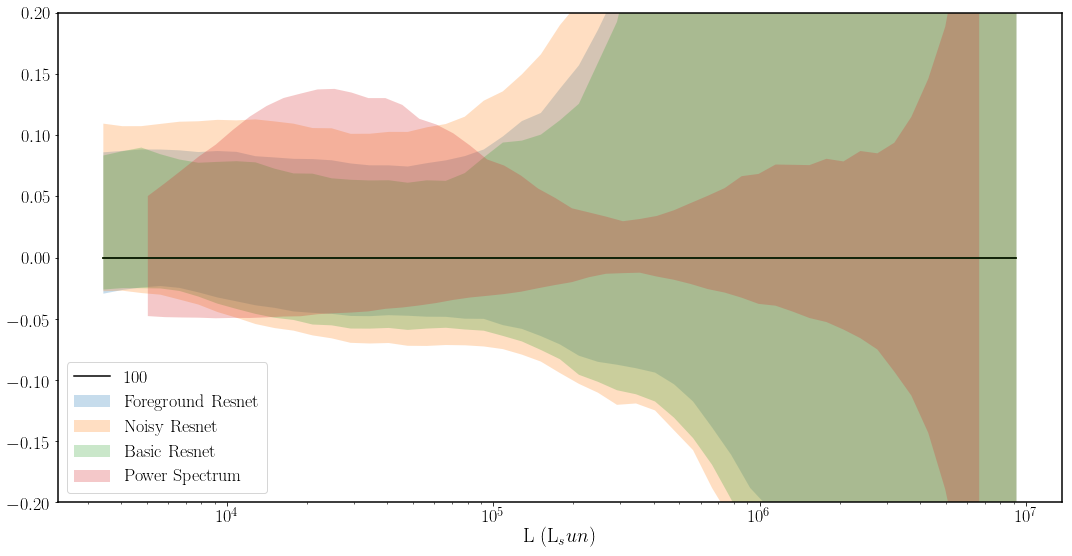

In [206]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

In [207]:
res_list2 = [nfr_basic_resnet_pred, nfr_noisy_foreground_resnet_pred, 
             nfr_noisy_foreground_random_resnet_pred]
res_list2.reverse()

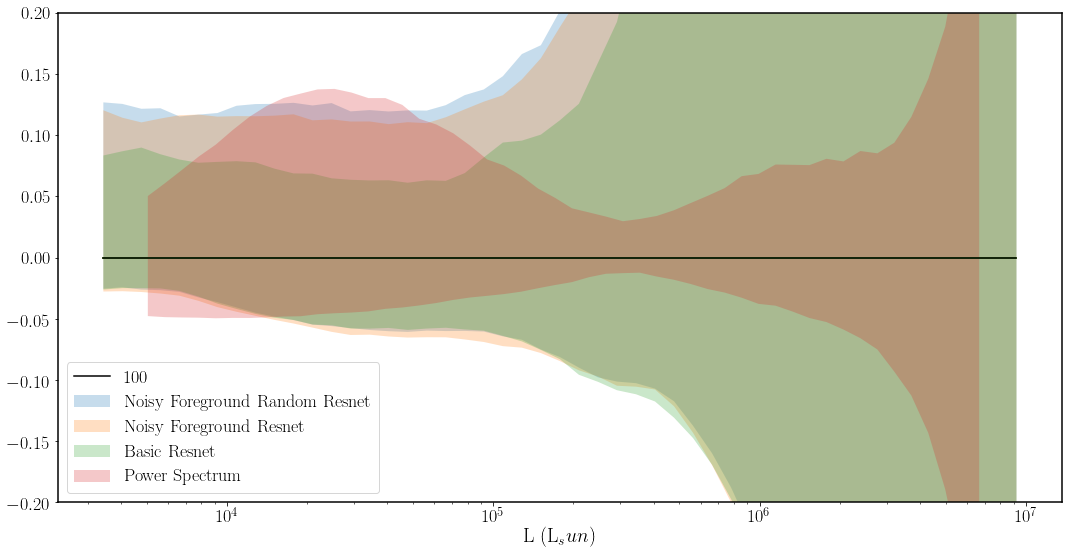

In [208]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

## Fully Trained model on fiducial Li parameters with Less Lums

In [14]:
nfr_basic_resnet_less_lums_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_basic_resnet_less_lums_basic_Li')
nfr_basic_resnet_less_lums_basic_Li_pred = Prediction(nfr_basic_resnet_less_lums_basic_Li_p, 'Basic Resnet')

nfr_noisy_resnet_less_lums_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_resnet_less_lums_basic_Li')
nfr_noisy_resnet_less_lums_basic_Li_pred = Prediction(nfr_noisy_resnet_less_lums_basic_Li_p, 'Noisy Resnet')

nfr_foreground_resnet_less_lums_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_foreground_resnet_less_lums_basic_Li')
nfr_foreground_resnet_less_lums_basic_Li_pred = Prediction(nfr_foreground_resnet_less_lums_basic_Li_p, 'Foreground Resnet')

nfr_noisy_foreground_resnet_less_lums_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_resnet_less_lums_basic_Li')
nfr_noisy_foreground_resnet_less_lums_basic_Li_pred = Prediction(nfr_noisy_foreground_resnet_less_lums_basic_Li_p, 'Noisy Foreground Resnet')

nfr_noisy_foreground_random_resnet_less_lums_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_random_resnet_less_lums_basic_Li')
nfr_noisy_foreground_random_resnet_less_lums_basic_Li_pred = Prediction(nfr_noisy_foreground_random_resnet_less_lums_basic_Li_p, 'Noisy Foreground Random Resnet')

In [210]:
res_list2 = [nfr_basic_resnet_less_lums_basic_Li_pred, nfr_noisy_resnet_less_lums_basic_Li_pred, 
             nfr_foreground_resnet_less_lums_basic_Li_pred]
res_list2.reverse()

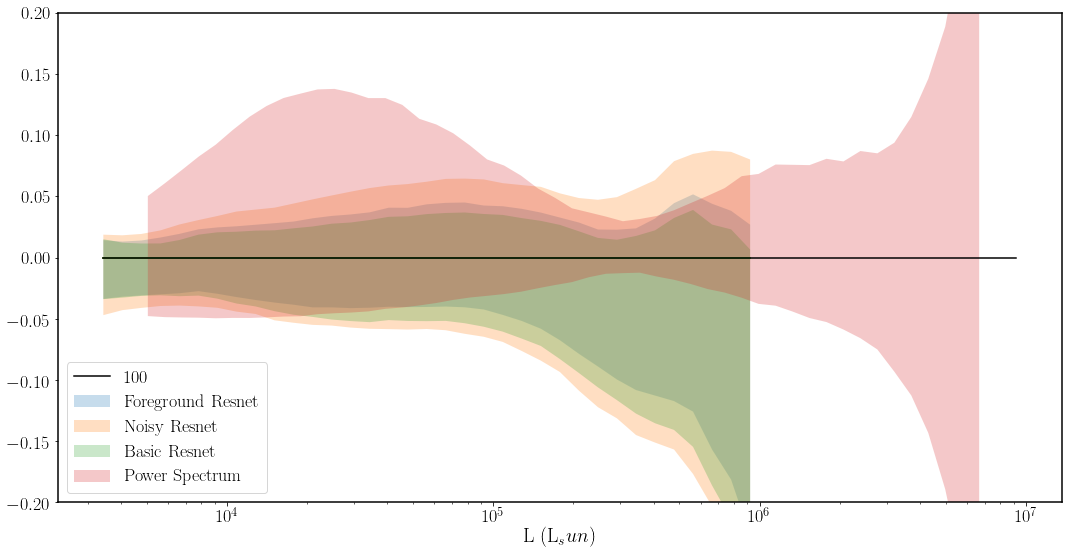

In [211]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

In [212]:
res_list2 = [nfr_basic_resnet_less_lums_basic_Li_pred, nfr_noisy_foreground_resnet_less_lums_basic_Li_pred, 
             nfr_noisy_foreground_random_resnet_less_lums_basic_Li_pred]
res_list2.reverse()

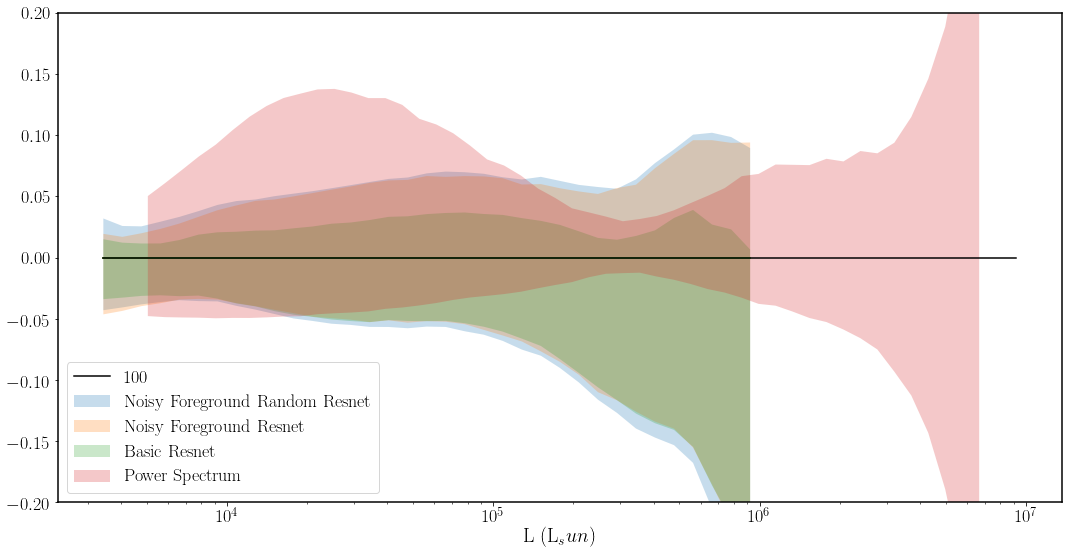

In [213]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

## Fully Trained model on random Li parameters with Less Lums

In [15]:
nfr_basic_resnet_less_lums_p = lnn.load_pickle(valPredictionLoc + 'nfr_basic_resnet_less_lums')
nfr_basic_resnet_less_lums_pred = Prediction(nfr_basic_resnet_less_lums_p, 'Basic Resnet')

nfr_noisy_resnet_less_lums_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_resnet_less_lums')
nfr_noisy_resnet_less_lums_pred = Prediction(nfr_noisy_resnet_less_lums_p, 'Noisy Resnet')

nfr_foreground_resnet_less_lums_p = lnn.load_pickle(valPredictionLoc + 'nfr_foreground_resnet_less_lums')
nfr_foreground_resnet_less_lums_pred = Prediction(nfr_foreground_resnet_less_lums_p, 'Foreground Resnet')

nfr_noisy_foreground_resnet_less_lums_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_resnet_less_lums')
nfr_noisy_foreground_resnet_less_lums_pred = Prediction(nfr_noisy_foreground_resnet_less_lums_p, 'Noisy Foreground Resnet')

nfr_noisy_foreground_random_resnet_less_lums_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_random_resnet_less_lums')
nfr_noisy_foreground_random_resnet_less_lums_pred = Prediction(nfr_noisy_foreground_random_resnet_less_lums_p, 'Noisy Foreground Random Resnet')

In [215]:
res_list2 = [nfr_basic_resnet_less_lums_pred, nfr_noisy_resnet_less_lums_pred, 
             nfr_foreground_resnet_less_lums_pred]
res_list2.reverse()

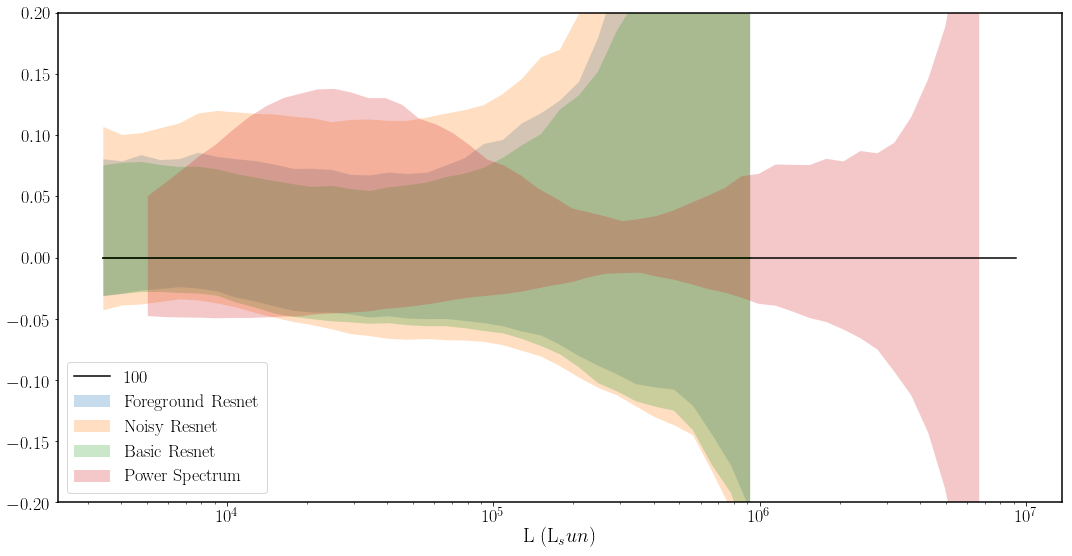

In [216]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

In [217]:
res_list2 = [nfr_basic_resnet_less_lums_pred, nfr_noisy_foreground_resnet_less_lums_pred, 
             nfr_noisy_foreground_random_resnet_less_lums_pred]
res_list2.reverse()

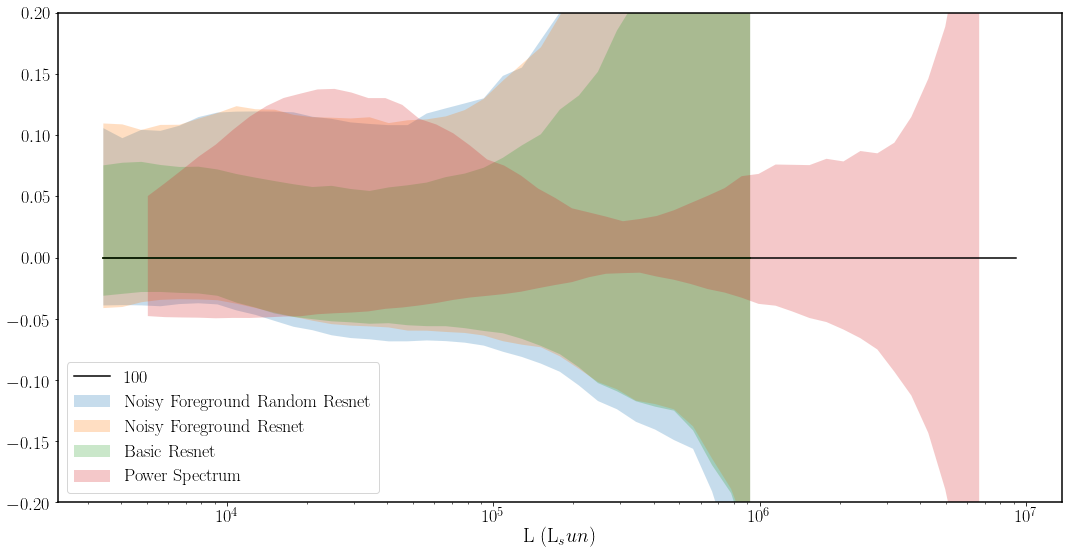

In [218]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False)

ax.fill_between(simulated_lum, -2*lower_ratio_log, 2*upper_ratio_log, label='Power Spectrum', alpha=0.25)
ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='lower left')
plt.show(ax)

## Untrained Tests

In [24]:
basic_Padmanabhan_p = lnn.load_pickle(valPredictionLoc + 'basic_Padmanabhan')
basic_Padmanabhan_pred = Prediction(basic_Padmanabhan_p, 'Padmanabhan')

geometric_noise_p = lnn.load_pickle(valPredictionLoc + 'geometric_noise')
geometric_noise_pred = Prediction(geometric_noise_p, 'Geometric Noise')

less_high_sources_p = lnn.load_pickle(valPredictionLoc + 'less_high_sources')
less_high_sources_pred = Prediction(less_high_sources_p, 'Less Bright Sources')

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


In [11]:
res_list2 = [basic_Padmanabhan_pred, geometric_noise_pred, 
             less_high_sources_pred]
res_list2.reverse()

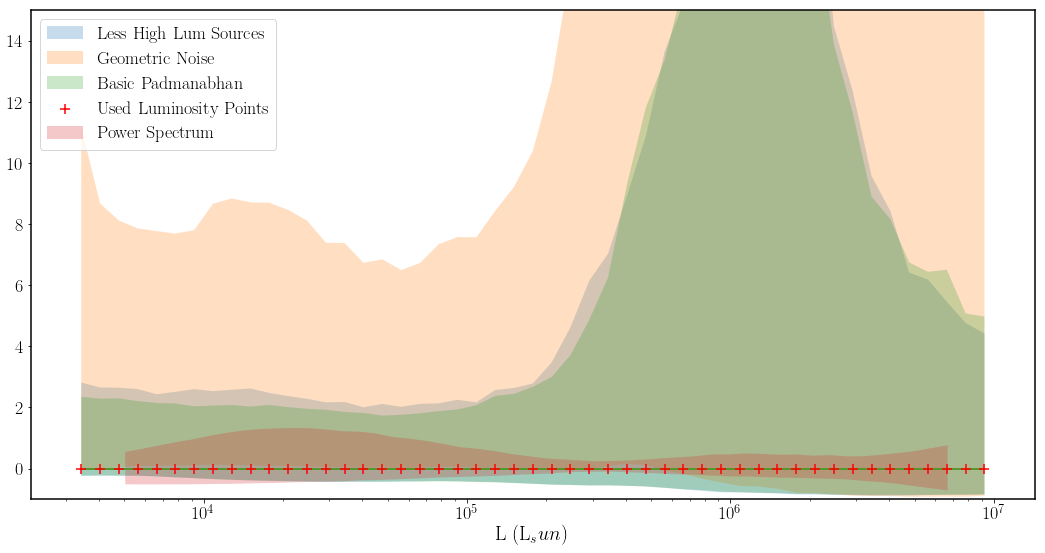

In [34]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False, transformed=True, lum_points=True, 
                      plot_range=(-1,15))

ax.fill_between(simulated_lum, -2*lower_err/simulated_phi, 2*upper_err/simulated_phi, alpha=0.25, label='Power Spectrum')
# ax.semilogx(lumLogBinCents, 1 - lumLogBinCents/lumLogBinCents, c='k', label='100% Accurate')

ax.legend(loc='upper left')
plt.show(ax)

## Predictive Power in Luminosity ranges

In [26]:
lumSwitch = 21

In [17]:
nfr_basic_resnet_basic_Li_pred.transformed_res_conf_interval[:,1]

array([ 0.14224274,  0.13528483,  0.14331594,  0.14996615,  0.14301209,
        0.13142307,  0.11944589,  0.11966573,  0.12369876,  0.1215308 ,
        0.13924947,  0.15263821,  0.1776685 ,  0.18475354,  0.20766033,
        0.23111071,  0.23138094,  0.25331572,  0.25371044,  0.24712784,
        0.22239386,  0.17675805,  0.13732612,  0.07943993,  0.02367004,
       -0.02337212, -0.0366486 , -0.04233732,  0.0218352 ,  0.03555471,
        0.04103567,  0.01447732, -0.02620017, -0.04806327, -0.11796209,
       -0.05294336, -0.06489576, -0.03676901,  0.02305028,  0.09916206,
        0.09740853,  0.1511455 ,  0.53715002,  0.85768629,  1.87450257,
        4.14050243,  4.80890765,  3.77214291,  3.18569788])

In [31]:
def get_accuracy(pred):
    upper_conf = pred.transformed_res_conf_interval[:,1]
    lower_conf = pred.transformed_res_conf_interval[:,0]
    
    print(upper_conf)
    print(lower_conf)
    print(upper_conf - lower_conf)

In [32]:
get_accuracy(nfr_basic_resnet_basic_Li_pred)

[ 0.14224274  0.13528483  0.14331594  0.14996615  0.14301209  0.13142307
  0.11944589  0.11966573  0.12369876  0.1215308   0.13924947  0.15263821
  0.1776685   0.18475354  0.20766033  0.23111071  0.23138094  0.25331572
  0.25371044  0.24712784  0.22239386  0.17675805  0.13732612  0.07943993
  0.02367004 -0.02337212 -0.0366486  -0.04233732  0.0218352   0.03555471
  0.04103567  0.01447732 -0.02620017 -0.04806327 -0.11796209 -0.05294336
 -0.06489576 -0.03676901  0.02305028  0.09916206  0.09740853  0.1511455
  0.53715002  0.85768629  1.87450257  4.14050243  4.80890765  3.77214291
  3.18569788]
[-0.27960783 -0.26858961 -0.26780082 -0.26378555 -0.27740818 -0.29965195
 -0.32287796 -0.3473728  -0.36167024 -0.37596317 -0.38500502 -0.38731622
 -0.38914599 -0.39488183 -0.38314051 -0.37661413 -0.37503358 -0.37273568
 -0.3677559  -0.37178209 -0.38252173 -0.40924244 -0.43651302 -0.47149951
 -0.5145668  -0.55751172 -0.58177577 -0.60048767 -0.61257317 -0.62788073
 -0.64991108 -0.68560008 -0.72732782 -

In [18]:
print(np.mean(nfr_basic_resnet_basic_Li_pred.transformed_res_conf_interval[0:lumSwitch,1]))
print(np.mean(nfr_basic_resnet_basic_Li_pred.transformed_res_conf_interval[lumSwitch+1:len(lumLogBinCents)-8,1]))

print(np.mean(nfr_basic_resnet_basic_Li_pred.transformed_res_conf_interval[0:21,0]))
print(np.mean(nfr_basic_resnet_basic_Li_pred.transformed_res_conf_interval[22:len(lumLogBinCents)-8,0]))

print(np.mean(nfr_basic_resnet_basic_Li_pred.transformed_res_conf_interval[:-8,1]))
print(np.mean(nfr_basic_resnet_basic_Li_pred.transformed_res_conf_interval[:-8,0]))

0.172885501847
0.00651411502045
-0.345269561023
-0.68690906049
0.0958810189278
-0.505150618761


In [19]:
print(np.mean(nfr_noisy_foreground_random_resnet_pred.transformed_res_conf_interval[0:21,1]))
print(np.mean(nfr_noisy_foreground_random_resnet_pred.transformed_res_conf_interval[22:len(lumLogBinCents)-8,1]))

print(np.mean(nfr_noisy_foreground_random_resnet_pred.transformed_res_conf_interval[0:21,0]))
print(np.mean(nfr_noisy_foreground_random_resnet_pred.transformed_res_conf_interval[22:len(lumLogBinCents)-8,0]))

1.98418364197
12.530426167
-0.366097739258
-0.660299836141


# Intrinsic Scatter

In [23]:
mapLoc = '../maps2/random_Li/'
mapLoc_basic = '../maps2/basic_Li/'
mapLoc_small = '../maps2/random_small_Li/'

In [24]:
subFields = lnn.loadBaseFNames(mapLoc)
base = [mapLoc + s for s in subFields]
lumLogBinCents = lnn.loadData(base[152] + '_lum.npz')['logBinCent']

subFields = lnn.loadBaseFNames(mapLoc_basic)
basic_base = [mapLoc_basic + s for s in subFields]

subFields = lnn.loadBaseFNames(mapLoc_small)
small_base = [mapLoc_small + s for s in subFields]

In [25]:
def load_lums(base, lumLogBinCents):
    lums = np.zeros([len(base), len(lumLogBinCents)])
    for i, b in enumerate(base):
        lums[i] = lnn.loadData(b + '_lum.npz')['lumFunc']
        
    return(lums)

def get_means_vars(lums):
    means = np.zeros(len(lums[0]))
    std = np.zeros(len(lums[0]))
    
    for i, val in enumerate(lums[0]):
        means[i] = np.mean(lums[:,i])
        std[i] = np.std(lums[:,i])
        
    return(means, std)

def get_means_confs(lums):
    pass

In [26]:
lums = load_lums(small_base, lumLogBinCents)
base_lums = load_lums(basic_base, lumLogBinCents)

In [27]:
means, std = get_means_vars(lums)
basic_means, basic_std = get_means_vars(base_lums)

In [28]:
means = np.zeros(len(lums[0]))
lower = np.zeros(len(lums[0]))
upper = np.zeros(len(lums[0]))

for i, val in enumerate(lums[0]):
    means[i] = np.mean(lums[:,i])
    ls = sorted(lums[:,i])[145:-145]
    
    lower[i] = (means[i] - ls[0]) / 2
    upper[i] = (ls[-1] - means[i]) / 2

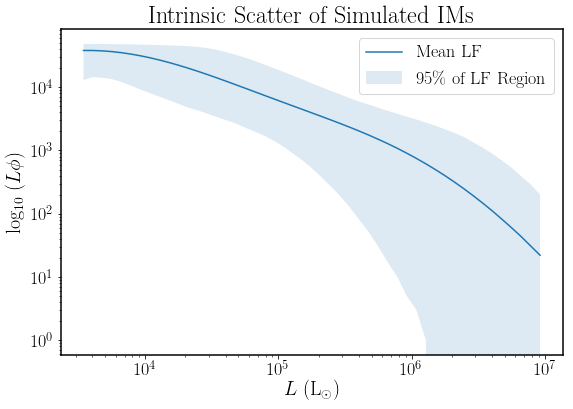

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))

plt.fill_between(lumLogBinCents, means-2*lower, means+2*upper, alpha=0.15, label='95\% of LF Region')
plt.plot(lumLogBinCents, means, label='Mean LF')

plt.xscale('log')
plt.yscale('log')
# plt.ylim([-0.75,0.75])
plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel('log$_{10}$ $( L \phi )$')
plt.title('Intrinsic Scatter of Simulated IMs')
plt.legend()

plt.show()

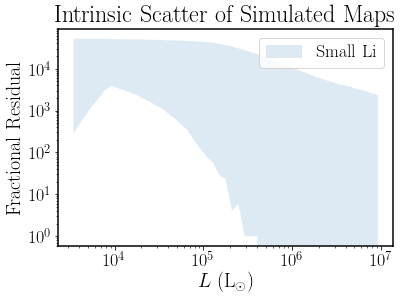

In [55]:
plt.fill_between(lumLogBinCents, means-2*lower, means+2*upper, alpha=0.15, label='Small Li')
# plt.fill_between(lumLogBinCents, basic_means-2*basic_std, basic_means+2*basic_std, alpha=0.15, label='Basic Li')

plt.xscale('log')
plt.yscale('log')
# plt.ylim([-0.75,0.75])
plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel('Fractional Residual')
plt.title('Intrinsic Scatter of Simulated Maps')
plt.legend()

plt.show()

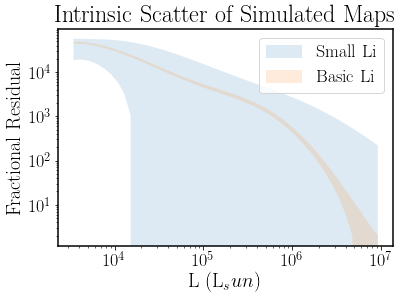

In [32]:
# plt.plot(lumLogBinCents, 1-means/means, c='b', label='Simulated')
plt.fill_between(lumLogBinCents, means-2*std, means+2*std, alpha=0.15, label='Small Li')
plt.fill_between(lumLogBinCents, basic_means-2*basic_std, basic_means+2*basic_std, alpha=0.15, label='Basic Li')

plt.xscale('log')
plt.yscale('log')
# plt.ylim([-0.75,0.75])
plt.xlabel('L (L_sun)')
plt.ylabel('Fractional Residual')
plt.title('Intrinsic Scatter of Simulated Maps')
plt.legend()

plt.show()

In [57]:
log_std = std / means / np.log(10)
log_basic_std = basic_std / basic_means / np.log(10)

log_lower = lower / means / np.log(10)
log_upper = upper / means / np.log(10)

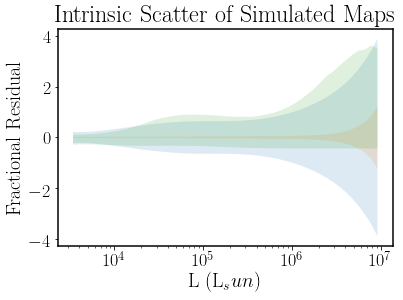

In [60]:
# plt.plot(lumLogBinCents, 1-means/means, c='b', label='Simulated')
plt.fill_between(lumLogBinCents, -2*log_std, 2*log_std, alpha=0.15, label='Small Li')
plt.fill_between(lumLogBinCents, -2*log_basic_std, 2*log_basic_std, alpha=0.15, label='Basic Li')
plt.fill_between(lumLogBinCents, -2*log_lower, 2*log_upper, alpha=0.15, label='Small Li')

plt.xscale('log')
# plt.ylim([-0.75,0.75])
plt.xlabel('L (L_sun)')
plt.ylabel('Fractional Residual')
plt.title('Intrinsic Scatter of Simulated Maps')
# plt.legend()

plt.show()

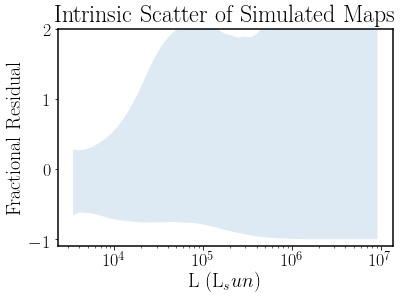

In [274]:
# plt.plot(lumLogBinCents, 1-means/means, c='b', label='Simulated')
plt.fill_between(lumLogBinCents, -2*lower/means, 2*upper/means, alpha=0.15, label='Small Li')


plt.xscale('log')
plt.ylim([-1.1,2])
plt.xlabel('L (L_sun)')
plt.ylabel('Fractional Residual')
plt.title('Intrinsic Scatter of Simulated Maps')
# plt.legend()

plt.show()

# Plots for paper

In [69]:
%autoreload

## Residual Plots

In [11]:
nfr_basic_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_basic_resnet_basic_Li')
nfr_basic_resnet_basic_Li_pred = Prediction(nfr_basic_resnet_basic_Li_p, 'No Noise')

nfr_noisy_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_resnet_basic_Li')
nfr_noisy_resnet_basic_Li_pred = Prediction(nfr_noisy_resnet_basic_Li_p, 'White Noise')

nfr_noisy_foreground_random_resnet_basic_Li_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_random_resnet_basic_Li')
nfr_noisy_foreground_random_resnet_basic_Li_pred = Prediction(nfr_noisy_foreground_random_resnet_basic_Li_p, 'Random White Noise and Foregrounds')


nfr_basic_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_basic_resnet')
nfr_basic_resnet_pred = Prediction(nfr_basic_resnet_p, 'No Noise')

nfr_noisy_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_resnet')
nfr_noisy_resnet_pred = Prediction(nfr_noisy_resnet_p, 'White Noise')

nfr_noisy_foreground_random_resnet_p = lnn.load_pickle(valPredictionLoc + 'nfr_noisy_foreground_random_resnet')
nfr_noisy_foreground_random_resnet_pred = Prediction(nfr_noisy_foreground_random_resnet_p, 'Random White Noise and Foregrounds')

basic_Padmanabhan_p = lnn.load_pickle(valPredictionLoc + 'basic_Padmanabhan')
basic_Padmanabhan_pred = Prediction(basic_Padmanabhan_p, 'Padmanabhan')

geometric_noise_p = lnn.load_pickle(valPredictionLoc + 'geometric_noise')
geometric_noise_pred = Prediction(geometric_noise_p, 'Geometric Noise')

less_high_sources_p = lnn.load_pickle(valPredictionLoc + 'less_high_sources')
less_high_sources_pred = Prediction(less_high_sources_p, 'Less Bright Sources')

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


In [70]:
# res_list2 = [nfr_basic_resnet_basic_Li_pred, 
#              nfr_foreground_resnet_basic_Li_pred, nfr_noisy_foreground_resnet_basic_Li_pred]
res_list2 = [nfr_basic_resnet_basic_Li_pred, nfr_noisy_resnet_basic_Li_pred, 
             nfr_noisy_foreground_random_resnet_basic_Li_pred]
res_list2.reverse()

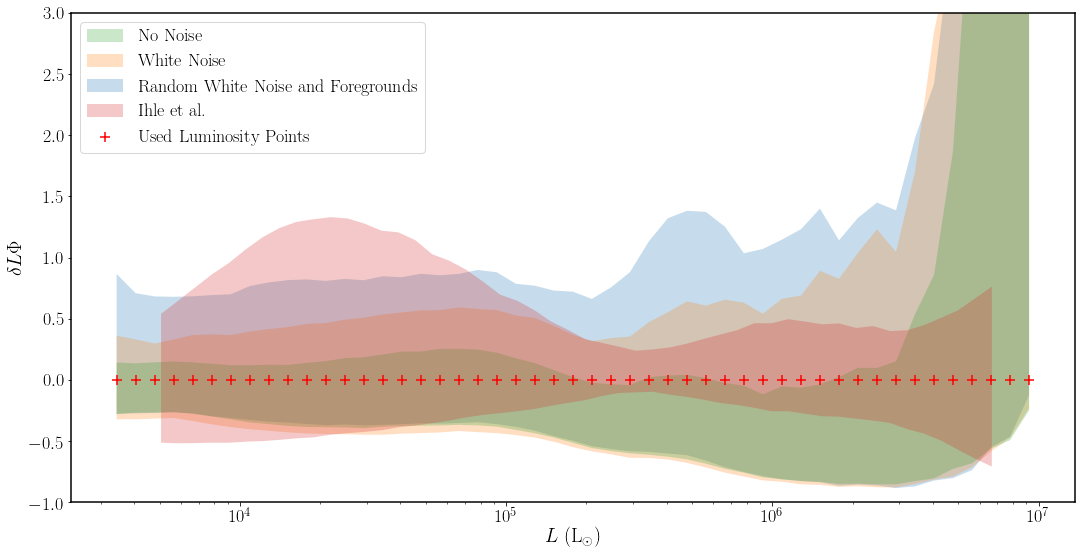

In [33]:
ax = plot_res_contour(res_list2, lumLogBinCents, False, use_std=False, transformed=True, lum_points=True,
                     )#plot_range=[-1, 9])

ax.fill_between(simulated_lum, -2*lower_err/simulated_phi, 2*upper_err/simulated_phi, alpha=0.25, label='Ihle et al.')

handles, labels = ax.get_legend_handles_labels()
ordering = [2,1,0,4,3]
handles = [handles[i] for i in ordering]
labels = [labels[i] for i in ordering]
ax.legend(handles, labels, loc='upper left')

plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel(r'$\delta L \Phi$')
# plt.title('Goodness of Resnet with Fidicuial Li et al parameters')
plt.show(ax)
# plt.savefig('../figures/basic_Li_comparison.pdf', bbox_inches='tight')
# plt.savefig('../figures/basic_Li_comparison_large.pdf', bbox_inches='tight')

In [84]:
# res_list2 = [nfr_basic_resnet_pred, 
#              nfr_foreground_resnet_pred, nfr_noisy_foreground_resnet_pred]
res_list2 = [nfr_basic_resnet_pred, nfr_noisy_resnet_pred, 
             nfr_noisy_foreground_random_resnet_pred]
res_list2.reverse()

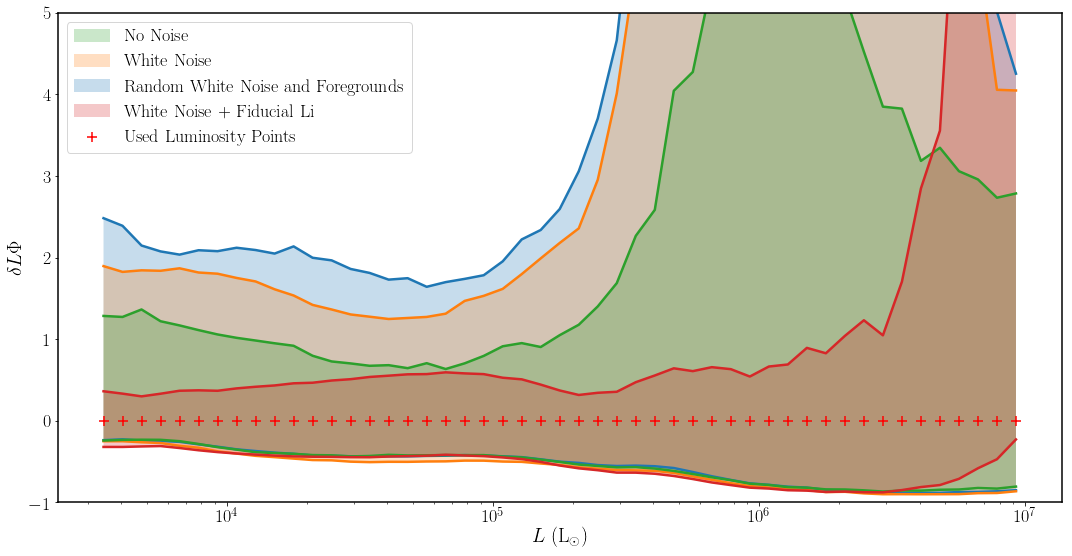

In [85]:
colors = ['tab:blue', 'tab:orange', 'tab:green']

ax = plot_res_contour_full(res_list2, lumLogBinCents, lum_points=True, colors=colors, plot_range=[-1, 5])#plot_range=[-1, 25])

color = 'tab:red'
plot_res_contour(ax, nfr_noisy_resnet_basic_Li_pred, lumLogBinCents, alpha=0.25, color=color,
                label='White Noise + Fiducial Li')

handles, labels = ax.get_legend_handles_labels()
ordering = [2,1,0,4,3]
handles = [handles[i] for i in ordering]
labels = [labels[i] for i in ordering]
ax.legend(handles, labels, loc='upper left')

plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel(r'$\delta L \Phi$')
plt.show(ax)
# plt.savefig('../figures/small_Li_comparison.pdf', bbox_inches='tight')
# plt.savefig('../figures/small_Li_comparison_large.pdf', bbox_inches='tight')

In [86]:
res_list2 = [basic_Padmanabhan_pred, geometric_noise_pred, 
             less_high_sources_pred]
res_list2.reverse()

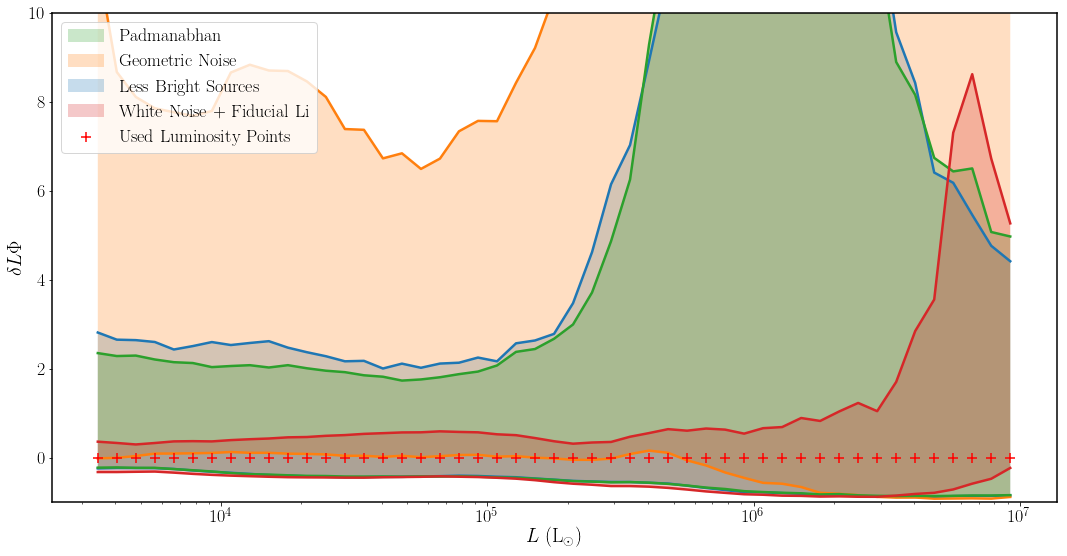

In [87]:
colors = ['tab:blue', 'tab:orange', 'tab:green']

ax = plot_res_contour_full(res_list2, lumLogBinCents, lum_points=True, colors=colors, plot_range=[-1, 10])#plot_range=[-1, 25])

color = 'tab:red'
plot_res_contour(ax, nfr_noisy_resnet_basic_Li_pred, lumLogBinCents, alpha=0.25, color=color,
                 label='White Noise + Fiducial Li')


handles, labels = ax.get_legend_handles_labels()
ordering = [2,1,0,4,3]
handles = [handles[i] for i in ordering]
labels = [labels[i] for i in ordering]
ax.legend(handles, labels, loc='upper left')

plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel(r'$\delta L \Phi$')
plt.show(ax)
# plt.savefig('../figures/random_comparison.pdf', bbox_inches='tight')
# plt.savefig('../figures/random_comparison_large.pdf', bbox_inches='tight')

In [88]:
res_list2 = [nfr_noisy_resnet_basic_Li_pred]
res_list2.reverse()

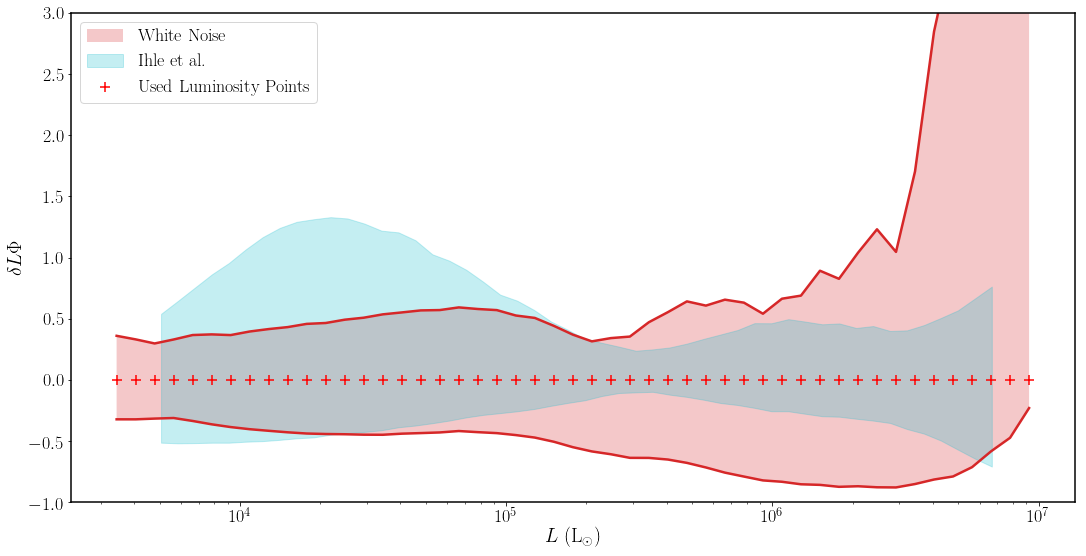

In [91]:
colors = ['tab:red']
ax = plot_res_contour_full(res_list2, lumLogBinCents, lum_points=True, colors=colors, plot_range=[-1, 3])#plot_range=[-1, 10])

color = 'tab:cyan'
ax.fill_between(simulated_lum, -2*lower_err/simulated_phi, 2*upper_err/simulated_phi, alpha=0.25, label='Ihle et al.', color=color)

handles, labels = ax.get_legend_handles_labels()
ordering = [0,2,1]
handles = [handles[i] for i in ordering]
labels = [labels[i] for i in ordering]
ax.legend(handles, labels, loc='upper left')

plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel(r'$\delta L \Phi$')
plt.show(ax)
# plt.savefig('../figures/random_comparison.pdf', bbox_inches='tight')
# plt.savefig('../figures/random_comparison_large.pdf', bbox_inches='tight')

## History

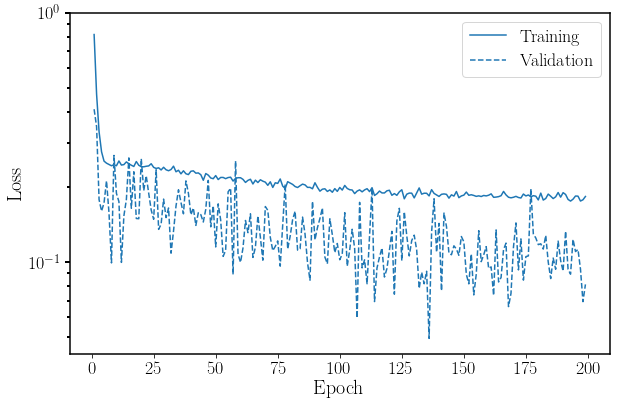

In [72]:
noisy_foreground_random_resnet_history = lnn.get_full_history('noisy_foreground_random_resnet', modelLoc5)
ax = lnn.plot_single_history(noisy_foreground_random_resnet_history)

ax.yaxis.set_tick_params(width=2, size=5)

for line in ax.yaxis.get_minorticklines():
    line.set_markersize(3)
    line.set_markeredgewidth(2)

lims = ax.get_ylim()
ax.set_ylim(lims[0], 1)
# ax.set_xlim(0, 200)

# plt.show(ax)
plt.savefig('../figures/training_history.pdf', bbox_inches='tight')

## Training Data

In [129]:
subFields = lnn.loadBaseFNames(mapLoc_small)
small_base = [mapLoc_small + s for s in subFields]
lums = load_lums(small_base, lumLogBinCents)

means = np.zeros(len(lums[0]))
lower = np.zeros(len(lums[0]))
upper = np.zeros(len(lums[0]))

for i, val in enumerate(lums[0]):
    means[i] = np.mean(lums[:,i])
    ls = sorted(lums[:,i])[145:-145]
    
    lower[i] = (means[i] - ls[0]) / 2
    upper[i] = (ls[-1] - means[i]) / 2

In [130]:
conv = conversion_to_make_Harvards_data_match_mine

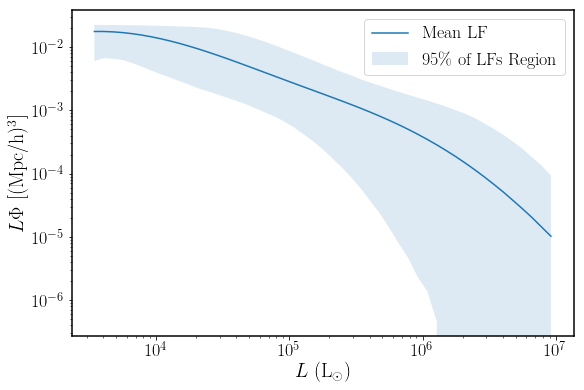

In [131]:
fig, ax = plt.subplots(figsize=(9, 6))

plt.fill_between(lumLogBinCents, (means-2*lower)/conv, (means+2*upper)/conv, alpha=0.15, label='95\% of LFs Region')
plt.plot(lumLogBinCents, means/conv, label='Mean LF')

plt.xscale('log')
plt.yscale('log')
# plt.ylim([-0.75,0.75])
plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel('$L \Phi$ [(Mpc/h)$^3$]')
# plt.title('Intrinsic Scatter of Simulated IMs')
plt.legend()

# plt.show(ax)
plt.savefig('../figures/training_lum_funcs.pdf', bbox_inches='tight')

## Network Test

In [41]:
conversion_to_make_Harvards_data_match_mine = 10**6.3342749483296803
conv = conversion_to_make_Harvards_data_match_mine

In [90]:
# Uses the last 20% of data as validation so it wants the value from the back of the array

# numb = np.random.choice(range(len(random_small_Li_base[-1000:])), 1)[0]
numb = 359

print(numb, random_small_Li_base[-numb], '----------------------------')

cur_lum_good, cnn_lum_good, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, -numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)

359 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13665_rotate_0_subfield_16__Li_-2.845e-02_1.324e+00_-1.739e+00_3.174e-01_2.883e-01 ----------------------------
Error and MSE for the given base_number:
[0.0025865740608423948, 0.0051868334412574768]


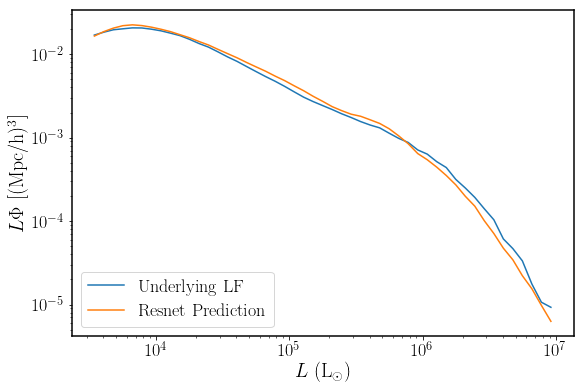

In [123]:
fig, ax = plt.subplots(figsize=(9, 6))

true_lum = 10**cur_lum_good
cnn_guess = 10**cnn_lum_good[0]

plt.plot(lumLogBinCents, true_lum/conv, label='Underlying LF')
plt.plot(lumLogBinCents, cnn_guess/conv, label='Resnet Prediction')

# conf = nfr_noisy_foreground_random_resnet_pred.transformed_res_conf_interval

# plt.fill_between(lumLogBinCents, true_lum*(1+conf[:,0])/conv, true_lum*(1+conf[:,1])/conv, 
#                  alpha=0.15, label='95\% Confidence Interval of Resnet')

plt.xscale('log')
plt.yscale('log')
# plt.ylim([1,10**5.5])
plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel('$L \Phi$ [(Mpc/h)$^3$]')
# # plt.title('Intrinsic Scatter of Simulated IMs')
plt.legend(loc='lower left')

# plt.show(ax)
plt.savefig('../figures/guess_range_good.pdf', bbox_inches='tight')

In [121]:
# Uses the last 20% of data as validation so it wants the value from the back of the array

# numb = np.random.choice(range(len(random_small_Li_base[-1159:])), 1)[0]
numb = 363

print(numb, random_small_Li_base[-numb], '----------------------------')

cur_lum_bad, cnn_lum_bad, loss = lnn.test_model(noisy_foreground_random_resnet, random_small_Li_base, -numb, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                       make_map_noisy=(0,20), add_foregrounds=True,
                                       random_foreground_params=True)

363 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13689_rotate_0_subfield_24__Li_-2.399e-02_1.455e+00_-1.124e+00_2.975e-01_2.810e-01 ----------------------------
Error and MSE for the given base_number:
[0.29404434561729431, 0.73532289266586304]


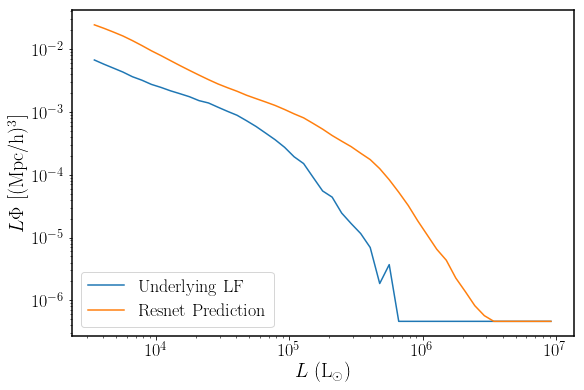

In [124]:
fig, ax = plt.subplots(figsize=(9, 6))

true_lum = 10**cur_lum_bad
cnn_guess = 10**cnn_lum_bad[0]

plt.plot(lumLogBinCents, true_lum/conv, label='Underlying LF')
plt.plot(lumLogBinCents, cnn_guess/conv, label='Resnet Prediction')

# conf = nfr_noisy_foreground_random_resnet_pred.transformed_res_conf_interval

# plt.fill_between(lumLogBinCents, true_lum*(1+conf[:,0])/conv, true_lum*(1+conf[:,1])/conv, 
#                  alpha=0.15, label='95\% Confidence Interval of Resnet')

plt.xscale('log')
plt.yscale('log')
# plt.ylim([1,10**5.5])
plt.xlabel('$L$ (L$_{\odot}$)')
plt.ylabel('$L \Phi$ [(Mpc/h)$^3$]')
# # plt.title('Intrinsic Scatter of Simulated IMs')
plt.legend(loc='lower left')

# plt.show(ax)
plt.savefig('../figures/guess_range_bad.pdf', bbox_inches='tight')

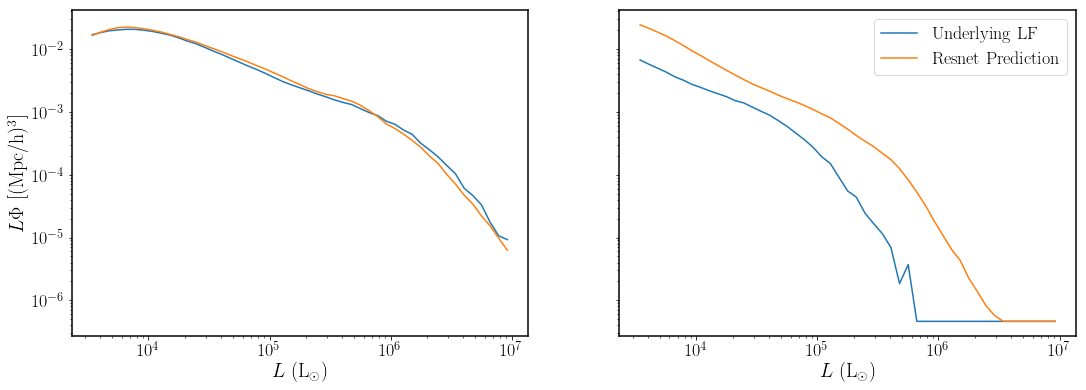

In [134]:
fig, ax = plt.subplots(1, 2, sharey='row', figsize=(18, 6))

true_lum_good = 10**cur_lum_good
cnn_guess_good = 10**cnn_lum_good[0]

true_lum_bad = 10**cur_lum_bad
cnn_guess_bad = 10**cnn_lum_bad[0]

ax[0].loglog(lumLogBinCents, true_lum_good/conv, label='Underlying LF')
ax[0].loglog(lumLogBinCents, cnn_guess_good/conv, label='Resnet Prediction')

ax[1].loglog(lumLogBinCents, true_lum_bad/conv, label='Underlying LF')
ax[1].loglog(lumLogBinCents, cnn_guess_bad/conv, label='Resnet Prediction')

ax[0].set_xlabel('$L$ (L$_{\odot}$)')
ax[0].set_ylabel('$L \Phi$ [(Mpc/h)$^3$]')

ax[1].set_xlabel('$L$ (L$_{\odot}$)')
ax[1].legend(loc='upper right')

# plt.show()
plt.savefig('../figures/guess_range.pdf', bbox_inches='tight')

## IM Slices

In [106]:
data = np.load(random_small_Li_base[745] + '_map.npz')

In [12]:
basic_map = data['map_cube']
log_mod_basic_map = lnn.log_modulus(basic_map)

noisy_map = np.random.normal(0, 11, basic_map.shape)

model_params_obj = lnn.ModelParams()
model_params_obj.give_attributes(pre_pool=1, pre_pool_z=1)
model_params_obj.clean_parser_data()
model_params_obj.get_map_info(random_small_Li_base[745] + '_map.npz')
foreground_map = lnn.makeFGcube(int(model_params_obj.pix_x), int(model_params_obj.pix_y), 
                                model_params_obj.omega_pix, model_params_obj.nu, 
                                random_foreground_params=False)

geometric_noise_map = lnn.make_geometric_noise_map(basic_map.shape, 1.0/22, 100)

combined_map = basic_map + noisy_map + foreground_map

In [10]:
basic_pool_map = skimage.measure.block_reduce(basic_map, (4, 4, 10), np.sum)
noisy_pool_map = skimage.measure.block_reduce(noisy_map, (4, 4, 10), np.sum)
foreground_pool_map = skimage.measure.block_reduce(foreground_map, (4, 4, 10), np.sum)
geometric_pool_noise_map = skimage.measure.block_reduce(geometric_noise_map, (4, 4, 10), np.sum)
combined_pool_map = skimage.measure.block_reduce(combined_map, (4, 4, 10), np.sum)

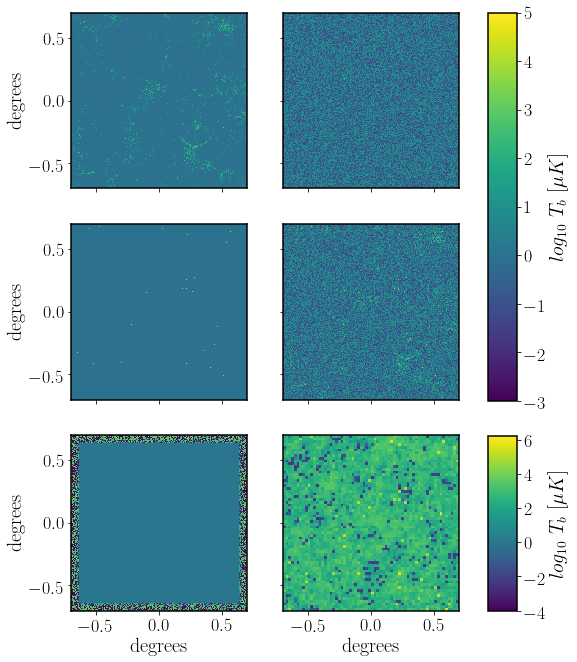

In [11]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(8, 11))

im = ax[0,0].imshow(lnn.log_modulus(basic_map[:,:,0]), 
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                vmin=-3,vmax=5)

im = ax[0,1].imshow(lnn.log_modulus(noisy_map[:,:,0]), 
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                vmin=-3,vmax=5)

im = ax[1,0].imshow(lnn.log_modulus(foreground_map[:,:,0]), 
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                vmin=-3,vmax=5)

im = ax[1,1].imshow(lnn.log_modulus(combined_map[:,:,0]), 
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                vmin=-3,vmax=5)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.39, 0.05, 0.49])
fig.colorbar(im, cax=cbar_ax, label=r'$log_{10}\ T_b\ [\mu K]$')

im = ax[2,0].imshow(lnn.log_modulus(geometric_noise_map[:,:,0]), 
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                vmin=-4.0,vmax=6.2)

im = ax[2,1].imshow(lnn.log_modulus(combined_pool_map[:,:,0]), 
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2],
                vmin=-4.0,vmax=6.2)

fig.subplots_adjust(right=0.8)
cbar_ax2 = fig.add_axes([0.85, 0.125, 0.05, 0.22])
fig.colorbar(im, cax=cbar_ax2, label=r'$log_{10}\ T_b\ [\mu K]$')

ax[0,0].set_adjustable('box-forced')
ax[0,1].set_adjustable('box-forced')
ax[1,0].set_adjustable('box-forced')
ax[1,1].set_adjustable('box-forced')
ax[2,0].set_adjustable('box-forced')
ax[2,1].set_adjustable('box-forced')

ax[0,0].set_ylabel('degrees')
ax[1,0].set_ylabel('degrees')
ax[2,0].set_ylabel('degrees')

ax[2,0].set_xlabel('degrees')
ax[2,1].set_xlabel('degrees')

plt.show()
# plt.savefig('../figures/IM_slices.pdf', bbox_inches='tight')

# Cosmic Cube Volume

In [73]:
%autoreload

In [74]:
from astropy.cosmology import Planck15 as cosmo
import scipy.integrate as integrate

In [75]:
omega = (1.5 * np.pi/180)**2

In [76]:
def E(z, cosmo):
    res = np.sqrt(cosmo.Ogamma0 * (1 + z)**4 + cosmo.Om0 * (1 + z)**3 + cosmo.Ode0)
    return(res)

In [105]:
cosmo.H(1)

<Quantity 120.48513569016934 km / (Mpc s)>

In [114]:
result = integrate.quad(lambda z: cosmo.angular_diameter_distance(z).value**2 * omega / cosmo.H(z).value *(1+z)**1, 2.4, 3.4)
result

(24.512964953592387, 2.72148580933078e-13)

In [115]:
new_conv = result[0] / (cosmo.H(0).value/100.0)**3 * 3*10**5 / nu*dnu

In [116]:
new_conv

1641932.1849429996

In [117]:
print(new_conv)
print(conversion_to_make_Harvards_data_match_mine)

1641932.1849429996
2159110.892223946


In [ ]:
### temp = omega * cosmo.angular_diameter_distance(2.9).value**2
temp * (cosmo.comoving_distance(3.4) - cosmo.comoving_distance(2.4)).value

In [81]:
nu = 115.27
dnu = 8
c = 3*10**8
omega * cosmo.angular_diameter_distance(2.9).value**2 * c/10**3/nu/cosmo.H(2.9).value * (1+2.9)**2 * dnu / (cosmo.H(0).value/100)**0

1984125.5888896426

In [95]:
lamb = 3*10**8/(nu*10**9) * 10**6
zz = 2.9

In [112]:
3.3*10**7 * (lamb / 158) * np.sqrt((1 + zz)/8) * (1.5**2/16) * (dnu/20)

21348710.661632702

In [108]:
1/(3*10**7)

3.3333333333333334e-08

In [250]:
val = 100
print((np.log10(2*val) - np.log10(val))/np.log10(val))
val = 1000
print((np.log10(2*val) - np.log10(val))/np.log10(val))
val = 10000
print((np.log10(2*val) - np.log10(val))/np.log10(val))

0.150514997832
0.100343331888
0.075257498916


In [255]:
perc = 1+0.125
val = 4.5
print((10**(perc * val) - 10**val)/10**val)
val = 3
print((10**(perc * val) - 10**val)/10**val)
val = 2
print((10**(perc * val) - 10**val)/10**val)

2.651741272548377
1.371373705661655
0.7782794100389228
